In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [142]:
remarks_supp_opp = pd.read_csv("prml20/remarks_supp_opp.csv")
tr = pd.read_csv("prml20/train.csv")
test = pd.read_csv("prml20/test.csv")
remarks = pd.read_csv("prml20/remarks.csv")
ratings = pd.read_csv("prml20/ratings.csv")

remarks=remarks.drop_duplicates()
remarks = remarks.dropna()

remarks_supp_opp=remarks_supp_opp.drop_duplicates()
remarks_supp_opp = remarks_supp_opp.dropna()

#ratings.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [143]:
#pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==1
#ratings[(ratings["comp"] == "bhqczwkj") & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==1)]["rating"].shape[0]
#ratings[(ratings["comp"] == "bnivzbfi") & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==12)]["rating"].shape[0]
len(str(np.sum(remarks[(remarks["comp"] == "bnivzbfi") & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==1)]["txt"])))
#len(np.sum(remarks[(remarks["comp"] == "bnivzbfi") & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==1)]["txt"]))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


37920

In [144]:
#(ratings["comp"] == comp_list[i])

In [145]:
##Company ratings
##Check whether ratings has all companies. It misses out one company, which is there in remarks_supp_opp, verified from the line below
print(set(remarks_supp_opp["comp"].unique()).issubset(set(ratings["comp"].unique())))
comp_list = np.unique(np.concatenate((ratings["comp"].unique(), remarks_supp_opp["comp"].unique())))

print(comp_list)

data = {"comp":comp_list}
comp_data = pd.DataFrame(data)
comp_data['TotNumEmployees'] = comp_data["comp"]
comp_data['AvgRating'] = comp_data["comp"]
comp_data['TotRating'] = comp_data["comp"]
comp_data['NumRating'] = comp_data["comp"]
comp_data['SuppOppMean']   = comp_data["comp"]
comp_data['NumLeft']   = comp_data["comp"]
comp_data['NumRemaining'] = comp_data["comp"]
comp_data['FracLeft'] = comp_data["comp"]
'''
comp_data['NumReviewJan'] = comp_data["comp"]
comp_data['NumReviewFeb'] = comp_data["comp"]
comp_data['NumReviewMar'] = comp_data["comp"]
comp_data['NumReviewApr'] = comp_data["comp"]
comp_data['NumReviewMay'] = comp_data["comp"]
comp_data['NumReviewJun'] = comp_data["comp"]
comp_data['NumReviewJul'] = comp_data["comp"]
comp_data['NumReviewAug'] = comp_data["comp"]
comp_data['NumReviewSep'] = comp_data["comp"]
comp_data['NumReviewOct'] = comp_data["comp"]
comp_data['NumReviewNov'] = comp_data["comp"]
comp_data['NumReviewDec'] = comp_data["comp"]

comp_data['ReviewJan'] = comp_data["comp"]
comp_data['ReviewFeb'] = comp_data["comp"]
comp_data['ReviewMar'] = comp_data["comp"]
comp_data['ReviewApr'] = comp_data["comp"]
comp_data['ReviewMay'] = comp_data["comp"]
comp_data['ReviewJun'] = comp_data["comp"]
comp_data['ReviewJul'] = comp_data["comp"]
comp_data['ReviewAug'] = comp_data["comp"]
comp_data['ReviewSep'] = comp_data["comp"]
comp_data['ReviewOct'] = comp_data["comp"]
comp_data['ReviewNov'] = comp_data["comp"]
comp_data['ReviewDec'] = comp_data["comp"]

comp_data['NumRemarkJan'] = comp_data["comp"]
comp_data['NumRemarkFeb'] = comp_data["comp"]
comp_data['NumRemarkMar'] = comp_data["comp"]
comp_data['NumRemarkApr'] = comp_data["comp"]
comp_data['NumRemarkMay'] = comp_data["comp"]
comp_data['NumRemarkJun'] = comp_data["comp"]
comp_data['NumRemarkJul'] = comp_data["comp"]
comp_data['NumRemarkAug'] = comp_data["comp"]
comp_data['NumRemarkSep'] = comp_data["comp"]
comp_data['NumRemarkOct'] = comp_data["comp"]
comp_data['NumRemarkNov'] = comp_data["comp"]
comp_data['NumRemarkDec'] = comp_data["comp"]

comp_data['LenRemarkJan'] = comp_data["comp"]
comp_data['LenRemarkFeb'] = comp_data["comp"]
comp_data['LenRemarkMar'] = comp_data["comp"]
comp_data['LenRemarkApr'] = comp_data["comp"]
comp_data['LenRemarkMay'] = comp_data["comp"]
comp_data['LenRemarkJun'] = comp_data["comp"]
comp_data['LenRemarkJul'] = comp_data["comp"]
comp_data['LenRemarkAug'] = comp_data["comp"]
comp_data['LenRemarkSep'] = comp_data["comp"]
comp_data['LenRemarkOct'] = comp_data["comp"]
comp_data['LenRemarkNov'] = comp_data["comp"]
comp_data['LenRemarkDec'] = comp_data["comp"]
'''
for i in range(len(comp_data['comp'])):
    Arr_emp_of_comp = ratings[ratings["comp"] == comp_list[i]]["emp"].append(tr[tr["comp"]==comp_list[i]]["emp"])
    Arr_emp_of_comp = Arr_emp_of_comp.append(remarks[remarks["comp"] == comp_list[i]]["emp"])
    Arr_emp_of_comp = Arr_emp_of_comp.append(remarks_supp_opp[remarks_supp_opp["comp"] == comp_list[i]]["emp"])
    comp_data['TotNumEmployees'].iloc[i] = Arr_emp_of_comp.unique().shape[0]
    comp_data['AvgRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]]["rating"].mean()
    comp_data['TotRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]]["rating"].sum()
    comp_data['NumRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]].shape[0]
    comp_data['SuppOppMean'].iloc[i]   = remarks_supp_opp[(remarks_supp_opp["comp"] == comp_list[i])]["support"].mean()
    comp_data['NumLeft'].iloc[i]   = tr[tr["comp"] == comp_list[i]]["left"].sum()
    comp_data['NumRemaining'].iloc[i] = Arr_emp_of_comp.unique().shape[0] - tr[tr["comp"] == comp_list[i]]["left"].sum()
    comp_data['FracLeft'].iloc[i] = tr[tr["comp"] == comp_list[i]]["left"].sum() / Arr_emp_of_comp.unique().shape[0]
    '''
    comp_data['NumReviewJan'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==1)]["rating"].shape[0]
    comp_data['NumReviewFeb'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==2)]["rating"].shape[0]
    comp_data['NumReviewMar'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==3)]["rating"].shape[0]
    comp_data['NumReviewApr'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==4)]["rating"].shape[0]
    comp_data['NumReviewMay'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==5)]["rating"].shape[0]
    comp_data['NumReviewJun'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==6)]["rating"].shape[0]
    comp_data['NumReviewJul'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==7)]["rating"].shape[0]
    comp_data['NumReviewAug'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==8)]["rating"].shape[0]
    comp_data['NumReviewSep'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==9)]["rating"].shape[0]
    comp_data['NumReviewOct'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==10)]["rating"].shape[0]
    comp_data['NumReviewNov'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==11)]["rating"].shape[0]
    comp_data['NumReviewDec'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==12)]["rating"].shape[0]
    
    comp_data['ReviewJan'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==1)]["rating"].mean()
    comp_data['ReviewFeb'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==2)]["rating"].mean()
    comp_data['ReviewMar'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==3)]["rating"].mean()
    comp_data['ReviewApr'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==4)]["rating"].mean()
    comp_data['ReviewMay'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==5)]["rating"].mean()
    comp_data['ReviewJun'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==6)]["rating"].mean()
    comp_data['ReviewJul'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==7)]["rating"].mean()
    comp_data['ReviewAug'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==8)]["rating"].mean()
    comp_data['ReviewSep'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==9)]["rating"].mean()
    comp_data['ReviewOct'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==10)]["rating"].mean()
    comp_data['ReviewNov'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==11)]["rating"].mean()
    comp_data['ReviewDec'].iloc[i] = ratings[(ratings["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(ratings["Date"])).month)==12)]["rating"].mean()
    
    comp_data['NumRemarkJan'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==1)]["txt"].shape[0]
    comp_data['NumRemarkFeb'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==2)]["txt"].shape[0]
    comp_data['NumRemarkMar'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==3)]["txt"].shape[0]
    comp_data['NumRemarkApr'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==4)]["txt"].shape[0]
    comp_data['NumRemarkMay'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==5)]["txt"].shape[0]
    comp_data['NumRemarkJun'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==6)]["txt"].shape[0]
    comp_data['NumRemarkJul'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==7)]["txt"].shape[0]
    comp_data['NumRemarkAug'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==8)]["txt"].shape[0]
    comp_data['NumRemarkSep'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==9)]["txt"].shape[0]
    comp_data['NumRemarkOct'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==10)]["txt"].shape[0]
    comp_data['NumRemarkNov'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==11)]["txt"].shape[0]
    comp_data['NumRemarkDec'].iloc[i] = remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==12)]["txt"].shape[0]
    
    comp_data['LenRemarkJan'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==1)]["txt"])))
    comp_data['LenRemarkFeb'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==2)]["txt"])))
    comp_data['LenRemarkMar'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==3)]["txt"])))
    comp_data['LenRemarkApr'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==4)]["txt"])))
    comp_data['LenRemarkMay'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==5)]["txt"])))
    comp_data['LenRemarkJun'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==6)]["txt"])))
    comp_data['LenRemarkJul'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==7)]["txt"])))
    comp_data['LenRemarkAug'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==8)]["txt"])))
    comp_data['LenRemarkSep'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==9)]["txt"])))
    comp_data['LenRemarkOct'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==10)]["txt"])))
    comp_data['LenRemarkNov'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==11)]["txt"])))
    comp_data['LenRemarkDec'].iloc[i] = len(str(np.sum(remarks[(remarks["comp"] == comp_list[i]) & (pd.Series(pd.DatetimeIndex(pd.to_datetime(remarks["remarkDate"])).month)==12)]["txt"])))
    '''
comp_data

True
['azalutpt' 'bhqczwkj' 'bnivzbfi' 'bucyzegb' 'dmgwoqhz' 'ejeyobsm'
 'ewpvmfbc' 'fjslutlg' 'fqsozvpv' 'iqdwmigj' 'jblrepyr' 'jnvpfmup'
 'lgqwnfsg' 'lydqevjo' 'nmxkgvmi' 'ocsicwng' 'oecfwdaq' 'ojidyfnn'
 'oqvaqcak' 'pfmjacpm' 'phcvroct' 'pkeebtfe' 'rcwkfavv' 'rcyiinms'
 'rujnkvse' 'siexkzzo' 'spfcrgea' 'ugldwwzf' 'ujplihug' 'vcqsbirc'
 'vwcdylha' 'wsmblohy' 'xccmgbjz' 'ydqdpmvi' 'ylpksopb' 'yodaczsb'
 'zptfoxyq']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:111: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:112: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:113: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:115: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/l

,comp,TotNumEmployees,AvgRating,TotRating,NumRating,SuppOppMean,NumLeft,NumRemaining,FracLeft,NumReviewJan,...,LenRemarkMar,LenRemarkApr,LenRemarkMay,LenRemarkJun,LenRemarkJul,LenRemarkAug,LenRemarkSep,LenRemarkOct,LenRemarkNov,LenRemarkDec
0,azalutpt,10,3.45652,159,46,NaN,0,10,0,4,...,1,1,1,1,1,1,1,1,1,1
1,bhqczwkj,265,3.08928,18063,5847,0.906019,7,258,0.0264151,731,...,1,1,1,1,1,1,1,1,1,1
2,bnivzbfi,356,3.23647,86595,26756,0.795631,18,338,0.0505618,2491,...,33310,19841,27391,32187,37537,24947,27202,49773,50920,34946
3,bucyzegb,9,3.39623,180,53,0.727273,0,9,0,0,...,1,1,1,1,1,1,1,1,1,1
4,dmgwoqhz,48,3.47532,11545,3322,0.962144,1,47,0.0208333,401,...,1,1,1,1,1,1,1,1,1,1
5,ejeyobsm,101,2.84384,15206,5347,0.788495,0,101,0,424,...,1,1,1,1,1,1,1,1,1,1
6,ewpvmfbc,169,2.64353,9522,3602,0.876229,8,161,0.0473373,127,...,13255,18985,2298,2099,2124,2523,2460,2967,3713,12880
7,fjslutlg,9,3.66667,55,15,NaN,0,9,0,0,...,1,1,1,1,1,1,1,1,1,1
8,fqsozvpv,60,2.77778,175,63,0.960725,0,60,0,0,...,1,1,1,1,1,1,1,1,1,1
9,iqdwmigj,142,2.48749,10338,4156,0.845769,4,138,0.028169,1046,...,41814,26196,41383,5999,5096,4043,4586,2181,2845,5216


In [244]:
## Create Company wise Dataframes, to make things easy(quicker) to preproces


#emp_list = ratings["emp"].unique()
#comp_list = ratings["comp"].unique()

comp_list = np.unique(np.concatenate((ratings["comp"].unique(), remarks_supp_opp["comp"].unique())))

df_comp_RatingOfEmp = {}
df_comp_RemarkOfEmp = {}
df_comp_SupOppOfEmp = {}
for i in comp_list:
    df_comp_RatingOfEmp[i] = ratings[ratings["comp"] == i]
    df_comp_RemarkOfEmp[i] = remarks[remarks["comp"] == i]
    df_comp_SupOppOfEmp[i] = remarks_supp_opp[remarks_supp_opp["comp"] == i]
df_comp_RatingOfEmp["phcvroct"]

,emp,comp,Date,rating
56689,47,phcvroct,2015-02-12,1
56690,3,phcvroct,2015-02-21,1
56691,20,phcvroct,2015-02-24,1
56692,54,phcvroct,2015-02-24,1
56693,66,phcvroct,2015-02-24,1
...,...,...,...,...
107163,956,phcvroct,2017-03-20,4
107164,64,phcvroct,2017-03-20,4
107165,79,phcvroct,2017-03-20,4
107166,162,phcvroct,2017-03-20,4


In [248]:
#print(tr["lastratingdate"][1:20])
tr["lastratingdate"] = pd.to_datetime(tr["lastratingdate"], dayfirst = True)
ratings["Date"] = pd.to_datetime(ratings["Date"], dayfirst = True)
remarks["remarkDate"] = pd.to_datetime(remarks["remarkDate"], dayfirst = True)
#print(tr["lastratingdate"][1:20])

tr_modified = copy.deepcopy(tr)
test_modified = copy.deepcopy(test)

In [249]:
tr_modified["cumm_rating"] = tr_modified["left"]
test_modified["cumm_rating"]= test_modified["emp"]
tr_modified["satisfied"] = tr_modified["left"]
test_modified["satisfied"]= test_modified["emp"]
tr_modified["unsatisfied"] = tr_modified["left"]
test_modified["unsatisfied"]= test_modified["emp"]
tr_modified["no_of_ratings"] = tr_modified["left"]
test_modified["no_of_ratings"]= test_modified["emp"]
#tr_modified["no_of_ratings_afterlastdate"] = tr_modified["left"]
#test_modified["no_of_ratings_afterlastdate"]= test_modified["emp"]

tr_modified["stingy_with_rating"] = tr_modified["left"] ## STD DEV
#tr_modified["stingy_with_rating2"] = tr_modified["left"]
#tr_modified["stingy_with_rating5"] = tr_modified["left"]
#tr_modified["stingy_with_rating10"] = tr_modified["left"]

test_modified["stingy_with_rating"] = test_modified["emp"] ## STD DEV
#test_modified["stingy_with_rating2"] = test_modified["emp"]
#test_modified["stingy_with_rating5"] = test_modified["emp"]
#test_modified["stingy_with_rating10"] = test_modified["emp"]

tr_modified["lastrtg"] = tr_modified["left"]
test_modified["lastrtg"]= test_modified["emp"]

tr_modified["last_2_ratings"] = tr_modified["left"]
test_modified["last_2_ratings"] = test_modified["emp"]

tr_modified["last_5_ratings"] = tr_modified["left"]
test_modified["last_5_ratings"] = test_modified["emp"]

tr_modified["last_10_ratings"] = tr_modified["left"]
test_modified["last_10_ratings"] = test_modified["emp"]

tr_modified["supp_opp"] = tr_modified["left"]
test_modified["supp_opp"]= test_modified["emp"]
tr_modified["Numsupp_opp"] = tr_modified["left"]
test_modified["Numsupp_opp"]= test_modified["emp"]

tr_modified["year"] = pd.DatetimeIndex(tr["lastratingdate"], dayfirst = True).year
test_modified["year"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"], dayfirst = True)).year
tr_modified["month"] = pd.DatetimeIndex(tr["lastratingdate"], dayfirst = True).month
test_modified["month"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"], dayfirst = True)).month
tr_modified["day"] = pd.DatetimeIndex(tr["lastratingdate"], dayfirst = True).day
test_modified["day"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"], dayfirst = True)).day
tr_modified["avg_rtg"] = tr_modified["left"]
test_modified["avg_rtg"] = test_modified["emp"]

tr_modified["avgDay"] = tr_modified["left"]
test_modified["avgDay"] = test_modified["emp"]
tr_modified["avgMonth"] = tr_modified["left"]
test_modified["avgMonth"] = test_modified["emp"]
tr_modified["avgYear"] = tr_modified["left"]
test_modified["avgYear"] = test_modified["emp"]
tr_modified["stdDay"] = tr_modified["left"]
test_modified["stdDay"] = test_modified["emp"]
tr_modified["stdMonth"] = tr_modified["left"]
test_modified["stdMonth"] = test_modified["emp"]
tr_modified["stdYear"] = tr_modified["left"]
test_modified["stdYear"] = test_modified["emp"]





tr_modified["CompTNE"] = tr_modified["left"]
test_modified["CompTNE"]= test_modified["emp"]
tr_modified["CompAvgRating"] = tr_modified["left"]
test_modified["CompAvgRating"]= test_modified["emp"]
tr_modified["CompTotRating"] = tr_modified["left"]
test_modified["CompTotRating"]= test_modified["emp"]
tr_modified["CompNumRating"] = tr_modified["left"]
test_modified["CompNumRating"]= test_modified["emp"]
tr_modified["CompSuppOppMean"] = tr_modified["left"]
test_modified["CompSuppOppMean"]= test_modified["emp"]
tr_modified["average_len_remark"] = tr_modified["left"]
test_modified["average_len_remark"] = test_modified["emp"]
tr_modified["CompNumLeft"] = tr_modified["left"]
test_modified["CompNumLeft"]= test_modified["emp"]
tr_modified["CompNumRemaining"] = tr_modified["left"]
test_modified["CompNumRemaining"]= test_modified["emp"]
tr_modified["CompFracLeft"] = tr_modified["left"]
test_modified["CompFracLeft"]= test_modified["emp"]

tr_modified["Personal_Comp_diff_Avg"] = tr_modified["left"]
test_modified["Personal_Comp_diff_Avg"] = test_modified["emp"]
'''
tr_modified['CompNumReviewJan'] = tr_modified["left"]
tr_modified['CompNumReviewFeb'] = tr_modified["left"]
tr_modified['CompNumReviewMar'] = tr_modified["left"]
tr_modified['CompNumReviewApr'] = tr_modified["left"]
tr_modified['CompNumReviewMay'] = tr_modified["left"]
tr_modified['CompNumReviewJun'] = tr_modified["left"]
tr_modified['CompNumReviewJul'] = tr_modified["left"]
tr_modified['CompNumReviewAug'] = tr_modified["left"]
tr_modified['CompNumReviewSep'] = tr_modified["left"]
tr_modified['CompNumReviewOct'] = tr_modified["left"]
tr_modified['CompNumReviewNov'] = tr_modified["left"]
tr_modified['CompNumReviewDec'] = tr_modified["left"]

tr_modified['CompReviewJan'] = tr_modified["left"]
tr_modified['CompReviewFeb'] = tr_modified["left"]
tr_modified['CompReviewMar'] = tr_modified["left"]
tr_modified['CompReviewApr'] = tr_modified["left"]
tr_modified['CompReviewMay'] = tr_modified["left"]
tr_modified['CompReviewJun'] = tr_modified["left"]
tr_modified['CompReviewJul'] = tr_modified["left"]
tr_modified['CompReviewAug'] = tr_modified["left"]
tr_modified['CompReviewSep'] = tr_modified["left"]
tr_modified['CompReviewOct'] = tr_modified["left"]
tr_modified['CompReviewNov'] = tr_modified["left"]
tr_modified['CompReviewDec'] = tr_modified["left"]

tr_modified['CompNumRemarkJan'] = tr_modified["left"]
tr_modified['CompNumRemarkFeb'] = tr_modified["left"]
tr_modified['CompNumRemarkMar'] = tr_modified["left"]
tr_modified['CompNumRemarkApr'] = tr_modified["left"]
tr_modified['CompNumRemarkMay'] = tr_modified["left"]
tr_modified['CompNumRemarkJun'] = tr_modified["left"]
tr_modified['CompNumRemarkJul'] = tr_modified["left"]
tr_modified['CompNumRemarkAug'] = tr_modified["left"]
tr_modified['CompNumRemarkSep'] = tr_modified["left"]
tr_modified['CompNumRemarkOct'] = tr_modified["left"]
tr_modified['CompNumRemarkNov'] = tr_modified["left"]
tr_modified['CompNumRemarkDec'] = tr_modified["left"]

tr_modified['CompLenRemarkJan'] = tr_modified["left"]
tr_modified['CompLenRemarkFeb'] = tr_modified["left"]
tr_modified['CompLenRemarkMar'] = tr_modified["left"]
tr_modified['CompLenRemarkApr'] = tr_modified["left"]
tr_modified['CompLenRemarkMay'] = tr_modified["left"]
tr_modified['CompLenRemarkJun'] = tr_modified["left"]
tr_modified['CompLenRemarkJul'] = tr_modified["left"]
tr_modified['CompLenRemarkAug'] = tr_modified["left"]
tr_modified['CompLenRemarkSep'] = tr_modified["left"]
tr_modified['CompLenRemarkOct'] = tr_modified["left"]
tr_modified['CompLenRemarkNov'] = tr_modified["left"]
tr_modified['CompLenRemarkDec'] = tr_modified["left"]

test_modified['CompNumReviewJan'] = test_modified["emp"]
test_modified['CompNumReviewFeb'] = test_modified["emp"]
test_modified['CompNumReviewMar'] = test_modified["emp"]
test_modified['CompNumReviewApr'] = test_modified["emp"]
test_modified['CompNumReviewMay'] = test_modified["emp"]
test_modified['CompNumReviewJun'] = test_modified["emp"]
test_modified['CompNumReviewJul'] = test_modified["emp"]
test_modified['CompNumReviewAug'] = test_modified["emp"]
test_modified['CompNumReviewSep'] = test_modified["emp"]
test_modified['CompNumReviewOct'] = test_modified["emp"]
test_modified['CompNumReviewNov'] = test_modified["emp"]
test_modified['CompNumReviewDec'] = test_modified["emp"]

test_modified['CompReviewJan'] = test_modified["emp"]
test_modified['CompReviewFeb'] = test_modified["emp"]
test_modified['CompReviewMar'] = test_modified["emp"]
test_modified['CompReviewApr'] = test_modified["emp"]
test_modified['CompReviewMay'] = test_modified["emp"]
test_modified['CompReviewJun'] = test_modified["emp"]
test_modified['CompReviewJul'] = test_modified["emp"]
test_modified['CompReviewAug'] = test_modified["emp"]
test_modified['CompReviewSep'] = test_modified["emp"]
test_modified['CompReviewOct'] = test_modified["emp"]
test_modified['CompReviewNov'] = test_modified["emp"]
test_modified['CompReviewDec'] = test_modified["emp"]

test_modified['CompNumRemarkJan'] = test_modified["emp"]
test_modified['CompNumRemarkFeb'] = test_modified["emp"]
test_modified['CompNumRemarkMar'] = test_modified["emp"]
test_modified['CompNumRemarkApr'] = test_modified["emp"]
test_modified['CompNumRemarkMay'] = test_modified["emp"]
test_modified['CompNumRemarkJun'] = test_modified["emp"]
test_modified['CompNumRemarkJul'] = test_modified["emp"]
test_modified['CompNumRemarkAug'] = test_modified["emp"]
test_modified['CompNumRemarkSep'] = test_modified["emp"]
test_modified['CompNumRemarkOct'] = test_modified["emp"]
test_modified['CompNumRemarkNov'] = test_modified["emp"]
test_modified['CompNumRemarkDec'] = test_modified["emp"]

test_modified['CompLenRemarkJan'] = test_modified["emp"]
test_modified['CompLenRemarkFeb'] = test_modified["emp"]
test_modified['CompLenRemarkMar'] = test_modified["emp"]
test_modified['CompLenRemarkApr'] = test_modified["emp"]
test_modified['CompLenRemarkMay'] = test_modified["emp"]
test_modified['CompLenRemarkJun'] = test_modified["emp"]
test_modified['CompLenRemarkJul'] = test_modified["emp"]
test_modified['CompLenRemarkAug'] = test_modified["emp"]
test_modified['CompLenRemarkSep'] = test_modified["emp"]
test_modified['CompLenRemarkOct'] = test_modified["emp"]
test_modified['CompLenRemarkNov'] = test_modified["emp"]
test_modified['CompLenRemarkDec'] = test_modified["emp"]
'''
tr_modified["num_opp"] = tr_modified["left"]
test_modified["num_opp"] =test_modified["emp"]

tr_modified["num_supp"] = tr_modified["left"]
test_modified["num_supp"] = test_modified["emp"]

tr_modified["num_remark"] = tr_modified["left"]
test_modified["num_remark"] = test_modified["emp"]

In [250]:
import time
t1 = time.time()
for i in range(tr.shape[0]):
    emp = tr_modified["emp"].iloc[i]
    comp = tr_modified["comp"].iloc[i]
    last_date = tr_modified["lastratingdate"].iloc[i]
    #print(comp, emp, pd.to_datetime(last_date), last_date)
    emp_rating_lastdate = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp) & (pd.to_datetime(df_comp_RatingOfEmp[comp]["Date"], dayfirst=True) <= pd.to_datetime(last_date, dayfirst=True))]
    
    emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp)]
    #emp_rating["Date"] = emp_rating["Date"].dt.date.values
    emp_rating["Date"] = pd.to_datetime(emp_rating["Date"], dayfirst=True).dt.date.values
    emp_rating = emp_rating.sort_values(by=["Date"],ascending = False)
    
    tr_modified["cumm_rating"].iloc[i] = emp_rating["rating"].mean()
    tr_modified["no_of_ratings"].iloc[i] = emp_rating.shape[0]
    #tr_modified["no_of_ratings_afterlastdate"].iloc[i] = emp_rating.shape[0] - emp_rating_lastdate.shape[0]
    tr_modified["avg_rtg"].iloc[i] = emp_rating["rating"].mean()/emp_rating.shape[0]
    tr_modified["supp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].mean()
    tr_modified["Numsupp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].shape[0]
    
    #print(comp, emp, last_date, pd.to_datetime(last_date, dayfirst=True), pd.to_datetime(emp_rating["Date"], dayfirst=True).dt.date.max(), tr_modified["year"].iloc[i], tr_modified["month"].iloc[i], tr_modified["day"].iloc[i], emp_rating.shape[0], emp_rating_lastdate.shape[0], tr_modified["left"].iloc[i])
    #print(emp_rating)
    #print(pd.to_datetime(emp_rating["Date"]).dt.date.values==pd.to_datetime(emp_rating["Date"]).dt.date.max())
    #print(emp_rating[pd.to_datetime(emp_rating["Date"]).dt.date.values==pd.to_datetime(emp_rating["Date"]).dt.date.max()]["rating"].values[0])
    tr_modified["lastrtg"].iloc[i] = emp_rating[pd.to_datetime(emp_rating["Date"]).dt.date.values==pd.to_datetime(emp_rating["Date"]).dt.date.max()]["rating"].values[0]
    if emp_rating.shape[0] >=2:
        tr_modified["last_2_ratings"].iloc[i] =  emp_rating["rating"].iloc[:2].mean()
    else:
        tr_modified["last_2_ratings"].iloc[i] =  emp_rating["rating"].mean()
    if emp_rating.shape[0] >=5:
        tr_modified["last_5_ratings"].iloc[i] =  emp_rating["rating"].iloc[:5].mean()
    else:
        tr_modified["last_5_ratings"].iloc[i] =  emp_rating["rating"].mean()
    if emp_rating.shape[0] >=10:
        tr_modified["last_10_ratings"].iloc[i] =  emp_rating["rating"].iloc[:10].mean()
    else:
        tr_modified["last_10_ratings"].iloc[i] =  emp_rating["rating"].mean()
        
    #if tr_modified["cumm_rating"].iloc[i]:
    tr_modified["stingy_with_rating"].iloc[i] = emp_rating["rating"].std()
        #tr_modified["stingy_with_rating2"].iloc[i] = tr_modified["last_2_ratings"].iloc[i]/tr_modified["cumm_rating"].iloc[i]
        #tr_modified["stingy_with_rating5"].iloc[i] = tr_modified["last_5_ratings"].iloc[i]/tr_modified["cumm_rating"].iloc[i]
        #tr_modified["stingy_with_rating10"].iloc[i] = tr_modified["last_10_ratings"].iloc[i]/tr_modified["cumm_rating"].iloc[i]
    #else:
     #   tr_modified["stingy_with_rating"].iloc[i] = -1
        #tr_modified["stingy_with_rating2"].iloc[i] = -1
        #tr_modified["stingy_with_rating5"].iloc[i] = -1
        #tr_modified["stingy_with_rating10"].iloc[i] = -1
    #print(pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).day.values)
    tr_modified["avgDay"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).day.values.mean()
    tr_modified["avgMonth"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).month.values.mean()
    tr_modified["avgYear"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).year.values.mean()
    tr_modified["stdDay"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).day.values.std()
    tr_modified["stdMonth"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).month.values.std()
    tr_modified["stdYear"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).year.values.std()
    
    tr_modified["num_supp"].iloc[i] = int(df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].sum())
    tr_modified["num_opp"].iloc[i] = int(df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["oppose"].sum())
    tr_modified["num_remark"].iloc[i] = df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] ==emp)]["txt"].shape[0]
    
    b = df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] == emp)]["txt"].shape[0]    
    a = np.sum(df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] ==emp)]["txt"]) 
    if a==0:
        tr_modified["average_len_remark"].iloc[i] = 0
    else:
        tr_modified["average_len_remark"].iloc[i] = len(a)/b
    #tr_modified["last"]
    
    tr_modified["CompTNE"].iloc[i] = float(comp_data["TotNumEmployees"].loc[comp_data["comp"]==comp])
    tr_modified["CompAvgRating"].iloc[i] = float(comp_data["AvgRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompTotRating"].iloc[i] = float(comp_data["TotRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompNumRating"].iloc[i] = float(comp_data["NumRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompSuppOppMean"].iloc[i] = float(comp_data["SuppOppMean"].loc[comp_data["comp"]==comp])
    tr_modified["CompNumLeft"].iloc[i] = float(comp_data["NumLeft"].loc[comp_data["comp"]==comp])
    tr_modified["CompNumRemaining"].iloc[i] = float(comp_data["NumRemaining"].loc[comp_data["comp"]==comp])
    tr_modified["CompFracLeft"].iloc[i] = float(comp_data["FracLeft"].loc[comp_data["comp"]==comp])
    
    tr_modified["Personal_Comp_diff_Avg"].iloc[i] = float(comp_data["AvgRating"].loc[comp_data["comp"]==comp]) - tr_modified["avg_rtg"].iloc[i]
    
    '''
    tr_modified['CompNumReviewJan'].iloc[i] = float(comp_data["NumReviewJan"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewFeb'].iloc[i] = float(comp_data["NumReviewFeb"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewMar'].iloc[i] = float(comp_data["NumReviewMar"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewApr'].iloc[i] = float(comp_data["NumReviewApr"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewMay'].iloc[i] = float(comp_data["NumReviewMay"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewJun'].iloc[i] = float(comp_data["NumReviewJun"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewJul'].iloc[i] = float(comp_data["NumReviewJul"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewAug'].iloc[i] = float(comp_data["NumReviewAug"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewSep'].iloc[i] = float(comp_data["NumReviewSep"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewOct'].iloc[i] = float(comp_data["NumReviewOct"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewNov'].iloc[i] = float(comp_data["NumReviewNov"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumReviewDec'].iloc[i] = float(comp_data["NumReviewDec"].loc[comp_data["comp"]==comp])

    tr_modified['CompReviewJan'].iloc[i] = float(comp_data["ReviewJan"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewFeb'].iloc[i] = float(comp_data["ReviewFeb"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewMar'].iloc[i] = float(comp_data["ReviewMar"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewApr'].iloc[i] = float(comp_data["ReviewApr"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewMay'].iloc[i] = float(comp_data["ReviewMay"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewJun'].iloc[i] = float(comp_data["ReviewJun"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewJul'].iloc[i] = float(comp_data["ReviewJul"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewAug'].iloc[i] = float(comp_data["ReviewAug"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewSep'].iloc[i] = float(comp_data["ReviewSep"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewOct'].iloc[i] = float(comp_data["ReviewOct"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewNov'].iloc[i] = float(comp_data["ReviewNov"].loc[comp_data["comp"]==comp])
    tr_modified['CompReviewDec'].iloc[i] = float(comp_data["ReviewDec"].loc[comp_data["comp"]==comp])
    
    tr_modified['CompNumRemarkJan'].iloc[i] = float(comp_data["NumRemarkJan"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkFeb'].iloc[i] = float(comp_data["NumRemarkFeb"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkMar'].iloc[i] = float(comp_data["NumRemarkMar"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkApr'].iloc[i] = float(comp_data["NumRemarkApr"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkMay'].iloc[i] = float(comp_data["NumRemarkMay"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkJun'].iloc[i] = float(comp_data["NumRemarkJun"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkJul'].iloc[i] = float(comp_data["NumRemarkJul"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkAug'].iloc[i] = float(comp_data["NumRemarkAug"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkSep'].iloc[i] = float(comp_data["NumRemarkSep"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkOct'].iloc[i] = float(comp_data["NumRemarkOct"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkNov'].iloc[i] = float(comp_data["NumRemarkNov"].loc[comp_data["comp"]==comp])
    tr_modified['CompNumRemarkDec'].iloc[i] = float(comp_data["NumRemarkDec"].loc[comp_data["comp"]==comp])
    
    tr_modified['CompLenRemarkJan'].iloc[i] = float(comp_data["LenRemarkJan"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkFeb'].iloc[i] = float(comp_data["LenRemarkFeb"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkMar'].iloc[i] = float(comp_data["LenRemarkMar"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkApr'].iloc[i] = float(comp_data["LenRemarkApr"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkMay'].iloc[i] = float(comp_data["LenRemarkMay"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkJun'].iloc[i] = float(comp_data["LenRemarkJun"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkJul'].iloc[i] = float(comp_data["LenRemarkJul"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkAug'].iloc[i] = float(comp_data["LenRemarkAug"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkSep'].iloc[i] = float(comp_data["LenRemarkSep"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkOct'].iloc[i] = float(comp_data["LenRemarkOct"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkNov'].iloc[i] = float(comp_data["LenRemarkNov"].loc[comp_data["comp"]==comp])
    tr_modified['CompLenRemarkDec'].iloc[i] = float(comp_data["LenRemarkDec"].loc[comp_data["comp"]==comp])
    '''
t2 = time.time()
print(t2-t1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


155.29133677482605


In [251]:
for i in range(tr.shape[0]):
    emp = tr_modified["emp"].iloc[i]
    comp = tr_modified["comp"].iloc[i]
    #last_date = tr_modified["lastratingdate"].iloc[i]
    emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp)]
    #print(emp_rating)
    if(np.where(emp_rating['rating']>=4)[0]!=[]):
        tr_modified["satisfied"].iloc[i] = (np.where(emp_rating["rating"]>=4)[0].shape[0])/emp_rating.shape[0]  
    else:
        tr_modified["satisfied"].iloc[i] = -1
        
    if(np.where((emp_rating['rating'])<=3)[0]!=[]):
        tr_modified["unsatisfied"].iloc[i] = (np.where(emp_rating["rating"]<=3)[0].shape[0])/emp_rating.shape[0]
    else:
        tr_modified["unsatisfied"].iloc[i] = -1
        
tr_modified.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


,id,emp,comp,lastratingdate,left,cumm_rating,satisfied,unsatisfied,no_of_ratings,stingy_with_rating,...,CompNumRating,CompSuppOppMean,average_len_remark,CompNumLeft,CompNumRemaining,CompFracLeft,Personal_Comp_diff_Avg,num_opp,num_supp,num_remark
0,2228,939,phcvroct,2016-10-17,1,3.000000,-1.000000,-1.000000,1,NaN,...,50479.0,0.833465,0.000000,230.0,559.0,0.291508,-0.408190,0,0,0
1,4349,250,jblrepyr,2017-03-19,0,3.767857,0.803571,0.196429,112,0.501927,...,5497.0,0.910327,136.326923,0.0,171.0,0.000000,2.995101,29,233,52
2,945,134,ewpvmfbc,2016-09-21,0,2.923077,-1.000000,1.000000,26,0.271746,...,3602.0,0.876229,45.800000,8.0,161.0,0.047337,2.531105,0,32,5
3,4553,164,wsmblohy,2017-03-17,0,2.411765,-1.000000,0.941176,17,0.795206,...,3648.0,0.775309,21.200000,52.0,378.0,0.120930,2.621838,1,19,5
4,941,129,ewpvmfbc,2016-04-04,0,2.800000,-1.000000,1.000000,5,0.447214,...,3602.0,0.876229,75.000000,8.0,161.0,0.047337,2.083531,1,7,2


In [252]:
import time
t1 = time.time()
for i in range(test.shape[0]):
    #if i%100 ==0:
    #    print(i)
    emp = test_modified["emp"].iloc[i]
    comp = test_modified["comp"].iloc[i]
    last_date = test_modified["lastratingdate"].iloc[i]
    emp_rating_lastdate = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp) & (pd.to_datetime(df_comp_RatingOfEmp[comp]["Date"], dayfirst=True) <= pd.to_datetime(last_date, dayfirst=True))]
    emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp)]
    #emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp) & (df_comp_RatingOfEmp[comp]["Date"] <= last_date)]
    #emp_rating["Date"] = pd.to_datetime(emp_rating["Date"]).dt.date.values
    emp_rating["Date"] = pd.to_datetime(emp_rating["Date"], dayfirst=True).dt.date.values
    emp_rating = emp_rating.sort_values(by=["Date"],ascending = False)
    
    test_modified["cumm_rating"].iloc[i]= emp_rating["rating"].mean()  
    test_modified["no_of_ratings"].iloc[i] = emp_rating["rating"].shape[0]
    #test_modified["no_of_ratings_afterlastdate"].iloc[i] = emp_rating.shape[0] - emp_rating_lastdate.shape[0]
    test_modified["supp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].mean()
    test_modified["Numsupp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].shape[0]
    if(np.where(emp_rating['rating']>=4)[0]!=[]):
        test_modified["satisfied"].iloc[i] = (np.where(emp_rating["rating"]>=4)[0].shape[0])/emp_rating.shape[0]  
    else:
        test_modified["satisfied"].iloc[i] = -1
     
    test_modified["lastrtg"].iloc[i] = emp_rating[pd.to_datetime(emp_rating["Date"]).dt.date.values==pd.to_datetime(emp_rating["Date"]).dt.date.max()]["rating"].values[0]
    
    if emp_rating.shape[0] >=2:
        test_modified["last_2_ratings"].iloc[i] =  emp_rating["rating"].iloc[:2].mean()
    else:
        test_modified["last_2_ratings"].iloc[i] =  emp_rating["rating"].mean()
    if emp_rating.shape[0] >=5:
        test_modified["last_5_ratings"].iloc[i] =  emp_rating["rating"].iloc[:5].mean()
    else:
        test_modified["last_5_ratings"].iloc[i] =  emp_rating["rating"].mean()
    if emp_rating.shape[0] >=10:
        test_modified["last_10_ratings"].iloc[i] =  emp_rating["rating"].iloc[:10].mean()
    else:
        test_modified["last_10_ratings"].iloc[i] =  emp_rating["rating"].mean()

    #if test_modified["cumm_rating"].iloc[i]:
    test_modified["stingy_with_rating"].iloc[i] = emp_rating["rating"].std()
        #test_modified["stingy_with_rating2"].iloc[i] = test_modified["last_2_ratings"].iloc[i]/test_modified["cumm_rating"].iloc[i]
        #test_modified["stingy_with_rating5"].iloc[i] = test_modified["last_5_ratings"].iloc[i]/test_modified["cumm_rating"].iloc[i]
        #test_modified["stingy_with_rating10"].iloc[i] = test_modified["last_10_ratings"].iloc[i]/test_modified["cumm_rating"].iloc[i]
    #else:
    #    test_modified["stingy_with_rating"].iloc[i] = -1
        #test_modified["stingy_with_rating2"].iloc[i] = -1
        #test_modified["stingy_with_rating5"].iloc[i] = -1
        #test_modified["stingy_with_rating10"].iloc[i] = -1
    
    if(np.where((emp_rating['rating'])<=3)[0]!=[]):
        test_modified["unsatisfied"].iloc[i] = (np.where(emp_rating["rating"]<=3)[0].shape[0])/emp_rating.shape[0]
    else:
        test_modified["unsatisfied"].iloc[i] = -1
    test_modified["avg_rtg"].iloc[i] = emp_rating["rating"].mean()/emp_rating.shape[0]
    test_modified["num_supp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].sum()
    test_modified["num_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["oppose"].sum()
    test_modified["num_remark"].iloc[i] = df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] ==emp)]["txt"].shape[0]
    
    test_modified["avgDay"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).day.values.mean()
    test_modified["avgMonth"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).month.values.mean()
    test_modified["avgYear"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).year.values.mean()
    test_modified["stdDay"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).day.values.std()
    test_modified["stdMonth"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).month.values.std()
    test_modified["stdYear"].iloc[i] = pd.DatetimeIndex((df_comp_RatingOfEmp[comp][df_comp_RatingOfEmp[comp]["emp"] == emp])["Date"]).year.values.std()
    
    b = df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] == emp)]["txt"].shape[0]    
    a = np.sum(df_comp_RemarkOfEmp[comp][(df_comp_RemarkOfEmp[comp]["emp"] ==emp)]["txt"]) 
    if a==0:
        test_modified["average_len_remark"].iloc[i] = 0
    else:
        test_modified["average_len_remark"].iloc[i] = len(a)/b
    
    test_modified["CompTNE"].iloc[i] = float(comp_data["TotNumEmployees"].loc[comp_data["comp"]==comp])
    test_modified["CompAvgRating"].iloc[i] = float(comp_data["AvgRating"].loc[comp_data["comp"]==comp])
    test_modified["CompTotRating"].iloc[i] = float(comp_data["TotRating"].loc[comp_data["comp"]==comp])
    test_modified["CompNumRating"].iloc[i] = float(comp_data["NumRating"].loc[comp_data["comp"]==comp])
    test_modified["CompSuppOppMean"].iloc[i] = float(comp_data["SuppOppMean"].loc[comp_data["comp"]==comp])
    test_modified["CompNumLeft"].iloc[i] = float(comp_data["NumLeft"].loc[comp_data["comp"]==comp])
    test_modified["CompNumRemaining"].iloc[i] = float(comp_data["NumRemaining"].loc[comp_data["comp"]==comp])
    test_modified["CompFracLeft"].iloc[i] = float(comp_data["FracLeft"].loc[comp_data["comp"]==comp])
    
    test_modified["Personal_Comp_diff_Avg"].iloc[i] = float(comp_data["AvgRating"].loc[comp_data["comp"]==comp]) - tr_modified["avg_rtg"].iloc[i]
    '''
    test_modified['CompNumReviewJan'].iloc[i] = float(comp_data["NumReviewJan"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewFeb'].iloc[i] = float(comp_data["NumReviewFeb"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewMar'].iloc[i] = float(comp_data["NumReviewMar"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewApr'].iloc[i] = float(comp_data["NumReviewApr"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewMay'].iloc[i] = float(comp_data["NumReviewMay"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewJun'].iloc[i] = float(comp_data["NumReviewJun"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewJul'].iloc[i] = float(comp_data["NumReviewJul"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewAug'].iloc[i] = float(comp_data["NumReviewAug"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewSep'].iloc[i] = float(comp_data["NumReviewSep"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewOct'].iloc[i] = float(comp_data["NumReviewOct"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewNov'].iloc[i] = float(comp_data["NumReviewNov"].loc[comp_data["comp"]==comp])
    test_modified['CompNumReviewDec'].iloc[i] = float(comp_data["NumReviewDec"].loc[comp_data["comp"]==comp])

    test_modified['CompReviewJan'].iloc[i] = float(comp_data["ReviewJan"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewFeb'].iloc[i] = float(comp_data["ReviewFeb"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewMar'].iloc[i] = float(comp_data["ReviewMar"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewApr'].iloc[i] = float(comp_data["ReviewApr"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewMay'].iloc[i] = float(comp_data["ReviewMay"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewJun'].iloc[i] = float(comp_data["ReviewJun"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewJul'].iloc[i] = float(comp_data["ReviewJul"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewAug'].iloc[i] = float(comp_data["ReviewAug"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewSep'].iloc[i] = float(comp_data["ReviewSep"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewOct'].iloc[i] = float(comp_data["ReviewOct"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewNov'].iloc[i] = float(comp_data["ReviewNov"].loc[comp_data["comp"]==comp])
    test_modified['CompReviewDec'].iloc[i] = float(comp_data["ReviewDec"].loc[comp_data["comp"]==comp])
    
    test_modified['CompNumRemarkJan'].iloc[i] = float(comp_data["NumRemarkJan"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkFeb'].iloc[i] = float(comp_data["NumRemarkFeb"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkMar'].iloc[i] = float(comp_data["NumRemarkMar"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkApr'].iloc[i] = float(comp_data["NumRemarkApr"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkMay'].iloc[i] = float(comp_data["NumRemarkMay"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkJun'].iloc[i] = float(comp_data["NumRemarkJun"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkJul'].iloc[i] = float(comp_data["NumRemarkJul"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkAug'].iloc[i] = float(comp_data["NumRemarkAug"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkSep'].iloc[i] = float(comp_data["NumRemarkSep"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkOct'].iloc[i] = float(comp_data["NumRemarkOct"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkNov'].iloc[i] = float(comp_data["NumRemarkNov"].loc[comp_data["comp"]==comp])
    test_modified['CompNumRemarkDec'].iloc[i] = float(comp_data["NumRemarkDec"].loc[comp_data["comp"]==comp])
    
    test_modified['CompLenRemarkJan'].iloc[i] = float(comp_data["LenRemarkJan"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkFeb'].iloc[i] = float(comp_data["LenRemarkFeb"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkMar'].iloc[i] = float(comp_data["LenRemarkMar"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkApr'].iloc[i] = float(comp_data["LenRemarkApr"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkMay'].iloc[i] = float(comp_data["LenRemarkMay"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkJun'].iloc[i] = float(comp_data["LenRemarkJun"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkJul'].iloc[i] = float(comp_data["LenRemarkJul"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkAug'].iloc[i] = float(comp_data["LenRemarkAug"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkSep'].iloc[i] = float(comp_data["LenRemarkSep"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkOct'].iloc[i] = float(comp_data["LenRemarkOct"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkNov'].iloc[i] = float(comp_data["LenRemarkNov"].loc[comp_data["comp"]==comp])
    test_modified['CompLenRemarkDec'].iloc[i] = float(comp_data["LenRemarkDec"].loc[comp_data["comp"]==comp])
    '''
t2 = time.time()
print(t2-t1)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: The truth value of an empty array is ambiguo

36.79881477355957


In [253]:
train_save = copy.deepcopy(tr_modified)
test_save = copy.deepcopy(test_modified)
test_modified.head()

,id,emp,comp,lastratingdate,cumm_rating,satisfied,unsatisfied,no_of_ratings,stingy_with_rating,lastrtg,...,CompNumRating,CompSuppOppMean,average_len_remark,CompNumLeft,CompNumRemaining,CompFracLeft,Personal_Comp_diff_Avg,num_opp,num_supp,num_remark
0,353,509,bnivzbfi,20-03-2017,4.000000,1.000000,-1.000000,43,0.000000,4,...,26756.0,0.795631,86.0,18.0,338.0,0.050562,0.236470,2,75,3
1,732,22,ocsicwng,17-03-2017,2.130435,-1.000000,1.000000,69,0.482428,2,...,6450.0,0.834179,43.8,3.0,135.0,0.021739,2.822172,6,82,5
2,3076,2,siexkzzo,09-01-2017,2.444444,-1.000000,1.000000,18,0.511310,3,...,16886.0,0.841929,0.0,6.0,287.0,0.020478,2.520761,8,19,0
3,2199,885,phcvroct,01-10-2016,2.831325,0.096386,0.903614,83,0.621157,1,...,50479.0,0.833465,67.5,230.0,559.0,0.291508,2.449942,7,205,2
4,2145,756,phcvroct,06-02-2017,2.111111,-1.000000,0.888889,9,1.166667,3,...,50479.0,0.833465,78.0,230.0,559.0,0.291508,2.031810,0,7,1


In [254]:
#tr_modified = copy.deepcopy(train_save)
#test_modified = copy.deepcopy(test_save)

In [255]:
#Adding average similarity with employees left
tr_modified = tr_modified.fillna(0.8521361472764343)
test_modified = test_modified.fillna(0.8521361472764343)
tr_modified = tr_modified.drop(["id","lastratingdate"],axis=1)
test_modified = test_modified.drop(["id","lastratingdate"],axis=1)

#tr_modified = tr_modified.drop(["lastratingdate"],axis=1)
#test_modified = test_modified.drop(["lastratingdate"],axis=1)

In [256]:
# map_comp = {}
# for l in np.unique(tr_modified["comp"]):
#     tot = tr_modified[tr_modified["comp"]==l].shape[0]
#     yes_left = tr_modified[(tr_modified["comp"]==l)&(tr_modified["left"]==1)].shape[0]
#     map_comp[l] = yes_left/tot
# tr_modified["comp"] = tr_modified["comp"].map(map_comp)
# test_modified["comp"] = test_modified["comp"].map(map_comp)


In [257]:
tr_modified_2 = copy.deepcopy(tr_modified)
tr_modified_2 = tr_modified.drop(["left"],axis=1)

In [258]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix_train = cosine_similarity(tr_modified_2[["cumm_rating","supp_opp","Numsupp_opp","satisfied","unsatisfied"]],tr_modified_2[tr_modified["left"] == 1][["cumm_rating","supp_opp","Numsupp_opp","satisfied","unsatisfied"]])
similarity_matrix_test = cosine_similarity(test_modified[["cumm_rating","supp_opp","Numsupp_opp","satisfied","unsatisfied"]],tr_modified_2[tr_modified["left"] == 1][["cumm_rating","supp_opp","Numsupp_opp","satisfied","unsatisfied"]])
#similarity_matrix_train = cosine_similarity(tr_modified_2,tr_modified_2[tr_modified["left"] == 1])
#similarity_matrix_test = cosine_similarity(test_modified,tr_modified_2[tr_modified["left"] == 1])

In [259]:
tr_modified["similarity_with_left_emp"] = np.mean(similarity_matrix_train,axis=1)
test_modified["similarity_with_left_emp"] = np.mean(similarity_matrix_test,axis=1)

In [260]:
Y_tr = copy.deepcopy(tr_modified["left"])
tr_modified = tr_modified.drop(["left"],axis=1)


#tr_modified = tr_modified.drop(["id"],axis=1)
#test_modified = test_modified.drop(["id"],axis=1)
#Y_tr = copy.deepcopy(tr_modified_3["left"])
#tr_modified_3 = tr_modified_3.drop(["left"],axis=1)

In [261]:
comp_list

array(['azalutpt', 'bhqczwkj', 'bnivzbfi', 'bucyzegb', 'dmgwoqhz',
       'ejeyobsm', 'ewpvmfbc', 'fjslutlg', 'fqsozvpv', 'iqdwmigj',
       'jblrepyr', 'jnvpfmup', 'lgqwnfsg', 'lydqevjo', 'nmxkgvmi',
       'ocsicwng', 'oecfwdaq', 'ojidyfnn', 'oqvaqcak', 'pfmjacpm',
       'phcvroct', 'pkeebtfe', 'rcwkfavv', 'rcyiinms', 'rujnkvse',
       'siexkzzo', 'spfcrgea', 'ugldwwzf', 'ujplihug', 'vcqsbirc',
       'vwcdylha', 'wsmblohy', 'xccmgbjz', 'ydqdpmvi', 'ylpksopb',
       'yodaczsb', 'zptfoxyq'], dtype=object)

In [262]:
tr_modified.columns

Index(['emp', 'comp', 'cumm_rating', 'satisfied', 'unsatisfied',
       'no_of_ratings', 'stingy_with_rating', 'lastrtg', 'last_2_ratings',
       'last_5_ratings', 'last_10_ratings', 'supp_opp', 'Numsupp_opp', 'year',
       'month', 'day', 'avg_rtg', 'avgDay', 'avgMonth', 'avgYear', 'stdDay',
       'stdMonth', 'stdYear', 'CompTNE', 'CompAvgRating', 'CompTotRating',
       'CompNumRating', 'CompSuppOppMean', 'average_len_remark', 'CompNumLeft',
       'CompNumRemaining', 'CompFracLeft', 'Personal_Comp_diff_Avg', 'num_opp',
       'num_supp', 'num_remark', 'similarity_with_left_emp'],
      dtype='object')

In [263]:
tr_modified_comp  = tr_modified.drop(['emp','CompTNE', 'CompAvgRating', 'CompTotRating', 'CompNumRating',
      'CompSuppOppMean','CompNumLeft','CompNumRemaining', 'CompFracLeft','similarity_with_left_emp'],axis = 1 )
test_modified_comp  = test_modified.drop(['emp','CompTNE', 'CompAvgRating', 'CompTotRating', 'CompNumRating',
      'CompSuppOppMean','CompNumLeft','CompNumRemaining', 'CompFracLeft','similarity_with_left_emp'],axis = 1 )
#tr_modified_comp  = tr_modified
#test_modified_comp  = test_modified

In [264]:
X_train = copy.deepcopy(tr_modified_comp)
Y_train = copy.deepcopy(Y_tr)
X_test = copy.deepcopy(test_modified_comp)

In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

In [266]:
from sklearn.ensemble import RandomForestClassifier
def evaluate(Y_values, Y_truth):
    weight_vec = 4*Y_truth+1
    return (np.sum((np.multiply(weight_vec, 1.*(Y_values==Y_truth))/np.sum(weight_vec))))

In [267]:
#models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
#                                                         class_weight='balanced')))
#models.append(('Random Forest', RandomForestClassifier(
#    n_estimators=100, random_state=7)))
#models.append(('SVM', SVC(gamma='auto', random_state=7)))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('Decision Tree Classifier',
#               DecisionTreeClassifier(random_state=7)))
#models.append(('Gaussian NB', GaussianNB()))
#models.append(('XGB', xgb.XGBClassifier()))
#models.append(('AdaBoost', AdaBoostClassifier(random_state=12)))

In [268]:
supprt_trees = {}
supprt_xgboost = {}
supprt_svm = {}

for comp in comp_list:
    print(comp)
    X_supp = X_train[X_train["comp"] != comp]
    Y_supp = Y_train[X_train["comp"] != comp]
    X_supp = X_supp.drop(["comp"],axis=1)
    size = Y_supp.size
    indices = np.array(range(len(Y_supp)))
    np.random.shuffle(indices)
    train_indices = indices[:int(0.8*len(Y_supp))]
    validationn_indices = indices[int(0.8*len(Y_supp)):]
    X_supp_train = X_supp.iloc[train_indices]
    Y_supp_train = Y_supp.iloc[train_indices]
    X_supp_val = X_supp.iloc[validationn_indices]
    Y_supp_val = Y_supp.iloc[validationn_indices]
    best = -1
    #for trees in range(1,100,10):
    #    if (trees-1)%25 == 0 :
    #        print(trees)
    #    rf = RandomForestClassifier(n_estimators=trees,random_state=43)
    #    rf.fit(X_supp_train,Y_supp_train)
    #    pred = rf.predict(X_supp_val)
    #    val_accss = evaluate(pred, Y_supp_val)
    #    if val_accss >=best:
    #        best = val_accss
    #        best_trees = trees
    #print(best)
    best_rf = RandomForestClassifier(n_estimators=best_trees,random_state=43)
    best_rf.fit(X_supp,Y_supp)
    #best_xgb = xgb.XGBClassifier()
    best_xgb = AdaBoostClassifier(random_state=12)
    #X_supp.info()
    best_xgb.fit(X_supp,Y_supp)
    best_svm = SVC(gamma='auto', random_state=7)
    best_svm.fit(X_supp,Y_supp)
    supprt_trees[comp] = best_rf
    supprt_xgboost[comp] = best_xgb
    supprt_svm[comp] = best_svm
    

azalutpt
bhqczwkj
bnivzbfi
bucyzegb
dmgwoqhz
ejeyobsm
ewpvmfbc
fjslutlg
fqsozvpv
iqdwmigj
jblrepyr
jnvpfmup
lgqwnfsg
lydqevjo
nmxkgvmi
ocsicwng
oecfwdaq
ojidyfnn
oqvaqcak
pfmjacpm
phcvroct
pkeebtfe
rcwkfavv
rcyiinms
rujnkvse
siexkzzo
spfcrgea
ugldwwzf
ujplihug
vcqsbirc
vwcdylha
wsmblohy
xccmgbjz
ydqdpmvi
ylpksopb
yodaczsb
zptfoxyq


In [271]:
size = Y_train.size
indices = np.array(range(len(Y_train)))
np.random.shuffle(indices)
train_indices = indices[:int(0.8*len(Y_train))]
validationn_indices = indices[int(0.8*len(Y_train)):]

X_train_comp = X_train.iloc[train_indices]
Y_train_comp = Y_train.iloc[train_indices]

X_validation_comp = X_train.iloc[validationn_indices]
Y_validation_comp = Y_train.iloc[validationn_indices]

In [272]:
rf_comp_dict = {}
#for comps in ["vwcdylha"]:
for comps in comp_list:
    print(comps)
    X_comp = X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1)
    Y_comp = Y_train_comp[X_train_comp["comp"] == comps]
    X_comp["support_preds1"] = X_comp["cumm_rating"]
    #X_comp["support_preds2"] = X_comp["cumm_rating"]
    #X_comp["support_preds3"] = X_comp["cumm_rating"]
    supp_tree= supprt_trees[comps]
    supp_xgboost= supprt_xgboost[comps]
    supp_svm= supprt_svm[comps]
    X_comp["support_preds1"] = supp_tree.predict(X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1))
    #X_comp["support_preds2"] = supp_xgboost.predict(X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1))
    #X_comp["support_preds3"] = supp_svm.predict(X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1))


    print(X_comp.shape)
    print(Y_comp.shape)
    size = Y_comp.size
    if size > 1:
        indices = np.array(range(len(Y_comp)))
        np.random.shuffle(indices)
        train_indices = indices[:int(0.9*len(Y_comp))]
        validationn_indices = indices[int(0.9*len(Y_comp)):]

        X_compwise_train = X_comp.iloc[train_indices]
        Y_compwise_train = Y_comp.iloc[train_indices]

        X_compwise_val = X_comp.iloc[validationn_indices]
        Y_compwise_val = Y_comp.iloc[validationn_indices]
    else:
        X_compwise_train = X_comp
        Y_compwise_train = Y_comp

        X_compwise_val = X_comp
        Y_compwise_val = Y_comp
        
    best = -1
    for trees in range(1,100,10):
        if (trees-1)%100==0:
            print(trees)
        rf = RandomForestClassifier(n_estimators=trees,random_state=43)
        rf.fit(X_compwise_train,Y_compwise_train)
        pred = rf.predict(X_compwise_val)

        val_accss = evaluate(pred, Y_compwise_val)
        #print(val_accss)
        if val_accss >= best:
#             print(val_accss)
#             print(trees)
            best_tree = trees
            best_rf = rf
            best = val_accss
    print(best)
    best_rf = RandomForestClassifier(n_estimators=best_tree,random_state=43)
    best_rf.fit(X_comp,Y_comp)
    rf_comp_dict[comps] = best_rf

azalutpt
(6, 27)
(6,)
1
1.0
bhqczwkj
(178, 27)
(178,)
1
1.0
bnivzbfi
(214, 27)
(214,)
1
0.7333333333333333
bucyzegb
(5, 27)
(5,)
1
1.0
dmgwoqhz
(33, 27)
(33,)
1
1.0
ejeyobsm
(63, 27)
(63,)
1
0.9999999999999998
ewpvmfbc
(107, 27)
(107,)
1
1.0
fjslutlg
(8, 27)
(8,)
1
1.0
fqsozvpv
(40, 27)
(40,)
1
1.0
iqdwmigj
(85, 27)
(85,)
1
1.0
jblrepyr
(115, 27)
(115,)
1
1.0
jnvpfmup
(12, 27)
(12,)
1
1.0
lgqwnfsg
(36, 27)
(36,)
1
1.0
lydqevjo
(11, 27)
(11,)
1
1.0
nmxkgvmi
(17, 27)
(17,)
1
1.0
ocsicwng
(88, 27)
(88,)
1
1.0
oecfwdaq
(10, 27)
(10,)
1
0.0
ojidyfnn
(49, 27)
(49,)
1
1.0
oqvaqcak
(9, 27)
(9,)
1
1.0
pfmjacpm
(9, 27)
(9,)
1
1.0
phcvroct
(384, 27)
(384,)
1
0.8315789473684212
pkeebtfe
(14, 27)
(14,)
1
1.0
rcwkfavv
(141, 27)
(141,)
1
0.9999999999999999
rcyiinms
(29, 27)
(29,)
1
1.0
rujnkvse
(44, 27)
(44,)
1
1.0
siexkzzo
(172, 27)
(172,)
1
0.6153846153846154
spfcrgea
(21, 27)
(21,)
1
1.0
ugldwwzf
(94, 27)
(94,)
1
0.9999999999999999
ujplihug
(144, 27)
(144,)
1
0.6774193548387095
vcqsbirc
(17, 27)
(

In [273]:
np.asarray(Y_compwise_val)

array([0])

In [275]:
X_val_Without_comp = X_validation_comp.drop(["comp"],axis=1)
X_val_Without_comp["support_preds1"] = X_validation_comp["cumm_rating"]
#X_val_Without_comp["support_preds2"] = X_validation_comp["cumm_rating"]
#X_val_Without_comp["support_preds3"] = X_validation_comp["cumm_rating"]
pred = np.zeros_like(Y_validation_comp)
for i in range(len(X_validation_comp['comp'])):
    comp = X_validation_comp['comp'].iloc[i]
    #print(comp)
    #print(X_validation_comp.columns)
    inp = X_validation_comp.iloc[i].drop(["comp"]).values
    #print(inp)
    supp_pred1 = supprt_trees[comps].predict([inp])
    supp_pred2 = supprt_xgboost[comps].predict([inp])
    supp_pred3 = supprt_svm[comps].predict([inp])
    #print(supp_pred)
    X_val_Without_comp["support_preds1"].iloc[i] = supp_pred1
    #X_val_Without_comp["support_preds2"].iloc[i] = supp_pred2
    #X_val_Without_comp["support_preds3"].iloc[i] = supp_pred3
    
    #comp = X_validation_comp["comp"].iloc[i]
    rf_req = rf_comp_dict[comp]
    pred[i] = rf_req.predict(np.asarray(X_val_Without_comp.iloc[i]).reshape(1,-1))

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

In [276]:
evaluate(pred,Y_validation_comp)

0.8391304347826086

In [277]:
X_val_Without_comp.columns

Index(['cumm_rating', 'satisfied', 'unsatisfied', 'no_of_ratings',
       'stingy_with_rating', 'lastrtg', 'last_2_ratings', 'last_5_ratings',
       'last_10_ratings', 'supp_opp', 'Numsupp_opp', 'year', 'month', 'day',
       'avg_rtg', 'avgDay', 'avgMonth', 'avgYear', 'stdDay', 'stdMonth',
       'stdYear', 'average_len_remark', 'Personal_Comp_diff_Avg', 'num_opp',
       'num_supp', 'num_remark', 'support_preds1'],
      dtype='object')

In [278]:
X_validation_comp

,comp,cumm_rating,satisfied,unsatisfied,no_of_ratings,stingy_with_rating,lastrtg,last_2_ratings,last_5_ratings,last_10_ratings,...,avgMonth,avgYear,stdDay,stdMonth,stdYear,average_len_remark,Personal_Comp_diff_Avg,num_opp,num_supp,num_remark
438,phcvroct,4.000000,-1.000000,-1.000000,1,0.852136,4,4.0,4.0,4.000000,...,9.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,-1.408190,0,0,0
2412,ewpvmfbc,3.500000,-1.000000,-1.000000,2,0.707107,4,3.5,3.5,3.500000,...,2.000000,2016.000000,3.000000,0.000000,0.000000,0.000000,0.893531,0,0,0
852,rcwkfavv,2.833333,-1.000000,1.000000,6,0.408248,2,2.5,2.8,2.833333,...,12.000000,2016.000000,4.422166,0.000000,0.000000,0.000000,2.530420,0,0,0
3169,xccmgbjz,2.500000,-1.000000,0.750000,4,1.290994,4,3.0,2.5,2.500000,...,3.000000,2017.000000,3.840573,0.000000,0.000000,5.666667,2.884695,0,1,3
430,siexkzzo,2.525424,0.033898,0.966102,59,0.652738,3,3.0,2.8,2.900000,...,2.118644,2017.000000,8.248963,0.715086,0.000000,93.000000,2.590383,13,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,xccmgbjz,3.000000,-1.000000,1.000000,2,0.000000,3,3.0,3.0,3.000000,...,2.500000,2017.000000,9.500000,0.500000,0.000000,0.000000,2.009695,0,0,0
3197,pkeebtfe,1.600000,-1.000000,1.000000,5,0.547723,2,2.0,1.6,1.600000,...,9.200000,2016.000000,11.045361,0.400000,0.000000,0.000000,3.098848,3,2,0
2613,phcvroct,2.600000,-1.000000,1.000000,5,0.547723,2,2.5,2.6,2.600000,...,6.800000,2016.400000,11.288933,4.791659,0.489898,0.000000,2.071810,0,0,0
2010,rujnkvse,2.333333,-1.000000,0.888889,9,1.000000,3,3.0,2.6,2.333333,...,11.333333,2016.000000,8.944272,0.471405,0.000000,67.000000,2.431456,1,17,4


In [279]:
acc = []
for k in range(10):
    size = Y_train.size
    indices = np.array(range(len(Y_train)))
    np.random.shuffle(indices)
    train_indices = indices[:int(0.8*len(Y_train))]
    validationn_indices = indices[int(0.8*len(Y_train)):]

    X_train_comp = X_train.iloc[train_indices]
    Y_train_comp = Y_train.iloc[train_indices]

    X_validation_comp = X_train.iloc[validationn_indices]
    Y_validation_comp = Y_train.iloc[validationn_indices]
    
    
    rf_comp_dict = {}
    for comps in comp_list:
        print(comps)
        X_comp = X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1)
        Y_comp = Y_train_comp[X_train_comp["comp"] == comps]
        X_comp["support_preds1"] = X_comp["cumm_rating"]
        #X_comp["support_preds2"] = X_comp["cumm_rating"]
        #X_comp["support_preds3"] = X_comp["cumm_rating"]
        if X_comp.shape[0] >0:
            
            supp_tree= supprt_trees[comps]
            supp_xgboost= supprt_xgboost[comps]
            supp_svm= supprt_svm[comps]
            X_comp["support_preds1"] = supp_tree.predict(X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1))
            #X_comp["support_preds2"] = supp_xgboost.predict(X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1))
            #X_comp["support_preds3"] = supp_svm.predict(X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1))

            print(X_comp.shape)
            print(Y_comp.shape)
            size = Y_comp.size
            if size > 1:
                indices = np.array(range(len(Y_comp)))
                np.random.shuffle(indices)
                train_indices = indices[:int(0.9*len(Y_comp))]
                validationn_indices = indices[int(0.9*len(Y_comp)):]

                X_compwise_train = X_comp.iloc[train_indices]
                Y_compwise_train = Y_comp.iloc[train_indices]

                X_compwise_val = X_comp.iloc[validationn_indices]
                Y_compwise_val = Y_comp.iloc[validationn_indices]
            else:
                X_compwise_train = X_comp
                Y_compwise_train = Y_comp

                X_compwise_val = X_comp
                Y_compwise_val = Y_comp

            best = -1
            if comps in ["ydqdpmvi",'yodaczsb','ujplihug','siexkzzo','ugldwwzf','rcwkfavv','phcvroct','ewpvmfbc','bnivzbfi','bhqczwkj']:
                max_trees = 100
            else:
                max_trees = 100
            for trees in range(1,max_trees,10):
                if (trees-1)%100==0:
                    print(trees)
                rf = RandomForestClassifier(n_estimators=trees,random_state=43)
                rf.fit(X_compwise_train,Y_compwise_train)
                pred = rf.predict(X_compwise_val)

                val_accss = evaluate(pred, Y_compwise_val)
                #print(val_accss)
                if val_accss >= best:
        #             print(val_accss)
        #             print(trees)
                    best_tree = trees
                    best_rf = rf
                    best = val_accss
            print(best)
            best_rf = RandomForestClassifier(n_estimators=best_tree,random_state=43)
            best_rf.fit(X_comp,Y_comp)
            rf_comp_dict[comps] = best_rf
        else:
            rf_comp_dict[comps] = best_rf
        
    X_val_Without_comp = X_validation_comp.drop(["comp"],axis=1)
    X_val_Without_comp["support_preds1"] = X_validation_comp["cumm_rating"]
    #X_val_Without_comp["support_preds2"] = X_validation_comp["cumm_rating"]
    #X_val_Without_comp["support_preds3"] = X_validation_comp["cumm_rating"]
    pred = np.zeros_like(Y_validation_comp)
    for i in range(len(X_validation_comp['comp'])):
        comp = X_validation_comp['comp'].iloc[i]
        #print(comp)
        #print(X_validation_comp.columns)
        inp = [X_validation_comp.iloc[i].drop(["comp"]).values]
        #print(inp)
        supp_pred1 = supprt_trees[comps].predict(inp)
        supp_pred2 = supprt_xgboost[comps].predict(inp)
        supp_pred3 = supprt_svm[comps].predict(inp)
        #print(supp_pred)
        X_val_Without_comp["support_preds1"].iloc[i] = supp_pred1
        #X_val_Without_comp["support_preds2"].iloc[i] = supp_pred2
        #X_val_Without_comp["support_preds3"].iloc[i] = supp_pred3

        #comp = X_validation_comp["comp"].iloc[i]
        rf_req = rf_comp_dict[comp]
        pred[i] = rf_req.predict(np.asarray(X_val_Without_comp.iloc[i]).reshape(1,-1))
    acc.append(evaluate(pred,Y_validation_comp))



azalutpt
(7, 27)
(7,)
1
1.0
bhqczwkj
(163, 27)
(163,)
1
0.9047619047619047
bnivzbfi
(215, 27)
(215,)
1
0.8076923076923076
bucyzegb
(4, 27)
(4,)
1
1.0
dmgwoqhz
(30, 27)
(30,)
1
1.0
ejeyobsm
(66, 27)
(66,)
1
0.9999999999999998
ewpvmfbc
(103, 27)
(103,)
1
0.6
fjslutlg
(8, 27)
(8,)
1
1.0
fqsozvpv
(37, 27)
(37,)
1
1.0
iqdwmigj
(89, 27)
(89,)
1
1.0
jblrepyr
(106, 27)
(106,)
1
1.0
jnvpfmup
(9, 27)
(9,)
1
1.0
lgqwnfsg
(41, 27)
(41,)
1
1.0
lydqevjo
(11, 27)
(11,)
1
1.0
nmxkgvmi
(17, 27)
(17,)
1
1.0
ocsicwng
(89, 27)
(89,)
1
0.6153846153846154
oecfwdaq
(12, 27)
(12,)
1
0.5
ojidyfnn
(48, 27)
(48,)
1
1.0
oqvaqcak
(5, 27)
(5,)
1
1.0
pfmjacpm
(9, 27)
(9,)
1
1.0
phcvroct
(368, 27)
(368,)
1
0.7948717948717947
pkeebtfe
(13, 27)
(13,)
1
1.0
rcwkfavv
(133, 27)
(133,)
1
0.9999999999999999
rcyiinms
(28, 27)
(28,)
1
1.0
rujnkvse
(46, 27)
(46,)
1
1.0
siexkzzo
(185, 27)
(185,)
1
0.9999999999999998
spfcrgea
(24, 27)
(24,)
1
1.0
ugldwwzf
(94, 27)
(94,)
1
0.9999999999999999
ujplihug
(148, 27)
(148,)
1
0.77777777

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

azalutpt
(6, 27)
(6,)
1
1.0
bhqczwkj
(180, 27)
(180,)
1
0.6153846153846154
bnivzbfi
(207, 27)
(207,)
1
0.8000000000000003
bucyzegb
(7, 27)
(7,)
1
1.0
dmgwoqhz
(32, 27)
(32,)
1
1.0
ejeyobsm
(63, 27)
(63,)
1
0.9999999999999998
ewpvmfbc
(103, 27)
(103,)
1
0.9090909090909092
fjslutlg
(9, 27)
(9,)
1
1.0
fqsozvpv
(39, 27)
(39,)
1
1.0
iqdwmigj
(91, 27)
(91,)
1
1.0
jblrepyr
(111, 27)
(111,)
1
1.0
jnvpfmup
(13, 27)
(13,)
1
1.0
lgqwnfsg
(30, 27)
(30,)
1
0.2857142857142857
lydqevjo
(12, 27)
(12,)
1
1.0
nmxkgvmi
(18, 27)
(18,)
1
1.0
ocsicwng
(91, 27)
(91,)
1
1.0
oecfwdaq
(9, 27)
(9,)
1
1.0
ojidyfnn
(40, 27)
(40,)
1
1.0
oqvaqcak
(9, 27)
(9,)
1
1.0
pfmjacpm
(9, 27)
(9,)
1
1.0
phcvroct
(370, 27)
(370,)
1
0.8160000000000001
pkeebtfe
(12, 27)
(12,)
1
1.0
rcwkfavv
(135, 27)
(135,)
1
0.5454545454545454
rcyiinms
(33, 27)
(33,)
1
1.0
rujnkvse
(50, 27)
(50,)
1
1.0
siexkzzo
(189, 27)
(189,)
1
0.9999999999999998
spfcrgea
(24, 27)
(24,)
1
1.0
ugldwwzf
(95, 27)
(95,)
1
0.7222222222222223
ujplihug
(142, 27)
(142

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

azalutpt
(10, 27)
(10,)
1
1.0
bhqczwkj
(182, 27)
(182,)
1
0.9999999999999998
bnivzbfi
(216, 27)
(216,)
1
0.6666666666666666
bucyzegb
(6, 27)
(6,)
1
1.0
dmgwoqhz
(26, 27)
(26,)
1
1.0
ejeyobsm
(64, 27)
(64,)
1
0.9999999999999998
ewpvmfbc
(112, 27)
(112,)
1
1.0
fjslutlg
(7, 27)
(7,)
1
1.0
fqsozvpv
(38, 27)
(38,)
1
1.0
iqdwmigj
(84, 27)
(84,)
1
0.7058823529411764
jblrepyr
(114, 27)
(114,)
1
1.0
jnvpfmup
(10, 27)
(10,)
1
1.0
lgqwnfsg
(37, 27)
(37,)
1
1.0
lydqevjo
(14, 27)
(14,)
1
1.0
nmxkgvmi
(17, 27)
(17,)
1
1.0
ocsicwng
(96, 27)
(96,)
1
1.0
oecfwdaq
(11, 27)
(11,)
1
1.0
ojidyfnn
(49, 27)
(49,)
1
1.0
oqvaqcak
(9, 27)
(9,)
1
1.0
pfmjacpm
(11, 27)
(11,)
1
1.0
phcvroct
(371, 27)
(371,)
1
0.9328358208955223
pkeebtfe
(12, 27)
(12,)
1
1.0
rcwkfavv
(134, 27)
(134,)
1
1.0000000000000002
rcyiinms
(26, 27)
(26,)
1
1.0
rujnkvse
(47, 27)
(47,)
1
1.0
siexkzzo
(183, 27)
(183,)
1
0.7826086956521738
spfcrgea
(19, 27)
(19,)
1
1.0
ugldwwzf
(90, 27)
(90,)
1
1.0
ujplihug
(151, 27)
(151,)
1
0.65625
vcqsbirc
(1

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

azalutpt
(7, 27)
(7,)
1
1.0
bhqczwkj
(178, 27)
(178,)
1
1.0
bnivzbfi
(221, 27)
(221,)
1
0.7741935483870966
bucyzegb
(7, 27)
(7,)
1
1.0
dmgwoqhz
(28, 27)
(28,)
1
1.0
ejeyobsm
(68, 27)
(68,)
1
0.9999999999999998
ewpvmfbc
(106, 27)
(106,)
1
0.9090909090909092
fjslutlg
(6, 27)
(6,)
1
1.0
fqsozvpv
(37, 27)
(37,)
1
1.0
iqdwmigj
(87, 27)
(87,)
1
1.0
jblrepyr
(117, 27)
(117,)
1
1.0
jnvpfmup
(11, 27)
(11,)
1
1.0
lgqwnfsg
(37, 27)
(37,)
1
1.0
lydqevjo
(12, 27)
(12,)
1
1.0
nmxkgvmi
(17, 27)
(17,)
1
1.0
ocsicwng
(92, 27)
(92,)
1
1.0
oecfwdaq
(11, 27)
(11,)
1
1.0
ojidyfnn
(43, 27)
(43,)
1
1.0
oqvaqcak
(9, 27)
(9,)
1
1.0
pfmjacpm
(10, 27)
(10,)
1
1.0
phcvroct
(370, 27)
(370,)
1
0.722772277227723
pkeebtfe
(11, 27)
(11,)
1
1.0
rcwkfavv
(140, 27)
(140,)
1
0.7222222222222223
rcyiinms
(31, 27)
(31,)
1
1.0
rujnkvse
(44, 27)
(44,)
1
1.0
siexkzzo
(183, 27)
(183,)
1
0.6296296296296295
spfcrgea
(21, 27)
(21,)
1
1.0
ugldwwzf
(94, 27)
(94,)
1
0.9285714285714285
ujplihug
(149, 27)
(149,)
1
0.7826086956521737
vcq

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

azalutpt
(9, 27)
(9,)
1
1.0
bhqczwkj
(174, 27)
(174,)
1
0.6153846153846154
bnivzbfi
(224, 27)
(224,)
1
0.6774193548387095
bucyzegb
(5, 27)
(5,)
1
1.0
dmgwoqhz
(29, 27)
(29,)
1
0.2857142857142857
ejeyobsm
(58, 27)
(58,)
1
0.9999999999999999
ewpvmfbc
(104, 27)
(104,)
1
0.9090909090909092
fjslutlg
(8, 27)
(8,)
1
1.0
fqsozvpv
(39, 27)
(39,)
1
1.0
iqdwmigj
(84, 27)
(84,)
1
1.0
jblrepyr
(109, 27)
(109,)
1
1.0
jnvpfmup
(15, 27)
(15,)
1
1.0
lgqwnfsg
(31, 27)
(31,)
1
1.0
lydqevjo
(12, 27)
(12,)
1
1.0
nmxkgvmi
(16, 27)
(16,)
1
1.0
ocsicwng
(93, 27)
(93,)
1
1.0
oecfwdaq
(9, 27)
(9,)
1
1.0
ojidyfnn
(50, 27)
(50,)
1
1.0
oqvaqcak
(8, 27)
(8,)
1
1.0
pfmjacpm
(10, 27)
(10,)
1
1.0
phcvroct
(386, 27)
(386,)
1
0.8592592592592592
pkeebtfe
(12, 27)
(12,)
1
1.0
rcwkfavv
(135, 27)
(135,)
1
0.9999999999999998
rcyiinms
(31, 27)
(31,)
1
1.0
rujnkvse
(49, 27)
(49,)
1
1.0
siexkzzo
(187, 27)
(187,)
1
0.9999999999999998
spfcrgea
(22, 27)
(22,)
1
1.0
ugldwwzf
(88, 27)
(88,)
1
0.7619047619047619
ujplihug
(146, 27)
(1

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

azalutpt
(7, 27)
(7,)
1
1.0
bhqczwkj
(181, 27)
(181,)
1
0.6296296296296295
bnivzbfi
(216, 27)
(216,)
1
0.8076923076923076
bucyzegb
(7, 27)
(7,)
1
1.0
dmgwoqhz
(29, 27)
(29,)
1
1.0
ejeyobsm
(67, 27)
(67,)
1
0.9999999999999998
ewpvmfbc
(101, 27)
(101,)
1
0.7368421052631577
fjslutlg
(7, 27)
(7,)
1
1.0
fqsozvpv
(33, 27)
(33,)
1
1.0
iqdwmigj
(85, 27)
(85,)
1
1.0
jblrepyr
(116, 27)
(116,)
1
1.0
jnvpfmup
(14, 27)
(14,)
1
1.0
lgqwnfsg
(40, 27)
(40,)
1
1.0
lydqevjo
(9, 27)
(9,)
1
1.0
nmxkgvmi
(19, 27)
(19,)
1
1.0
ocsicwng
(91, 27)
(91,)
1
1.0
oecfwdaq
(8, 27)
(8,)
1
1.0
ojidyfnn
(43, 27)
(43,)
1
1.0
oqvaqcak
(11, 27)
(11,)
1
1.0
pfmjacpm
(11, 27)
(11,)
1
1.0
phcvroct
(382, 27)
(382,)
1
0.6614173228346457
pkeebtfe
(12, 27)
(12,)
1
1.0
rcwkfavv
(136, 27)
(136,)
1
0.9545454545454544
rcyiinms
(25, 27)
(25,)
1
1.0
rujnkvse
(45, 27)
(45,)
1
1.0
siexkzzo
(172, 27)
(172,)
1
1.0
spfcrgea
(24, 27)
(24,)
1
1.0
ugldwwzf
(86, 27)
(86,)
1
0.39999999999999997
ujplihug
(147, 27)
(147,)
1
0.8387096774193546
vcq

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

azalutpt
(10, 27)
(10,)
1
1.0
bhqczwkj
(176, 27)
(176,)
1
0.6153846153846154
bnivzbfi
(216, 27)
(216,)
1
0.9999999999999998
bucyzegb
(6, 27)
(6,)
1
1.0
dmgwoqhz
(27, 27)
(27,)
1
0.2857142857142857
ejeyobsm
(65, 27)
(65,)
1
0.9999999999999998
ewpvmfbc
(102, 27)
(102,)
1
1.0
fjslutlg
(6, 27)
(6,)
1
1.0
fqsozvpv
(34, 27)
(34,)
1
1.0
iqdwmigj
(90, 27)
(90,)
1
1.0
jblrepyr
(111, 27)
(111,)
1
1.0
jnvpfmup
(14, 27)
(14,)
1
1.0
lgqwnfsg
(32, 27)
(32,)
1
1.0
lydqevjo
(11, 27)
(11,)
1
1.0
nmxkgvmi
(19, 27)
(19,)
1
1.0
ocsicwng
(96, 27)
(96,)
1
1.0
oecfwdaq
(11, 27)
(11,)
1
0.16666666666666666
ojidyfnn
(45, 27)
(45,)
1
1.0
oqvaqcak
(7, 27)
(7,)
1
1.0
pfmjacpm
(11, 27)
(11,)
1
1.0
phcvroct
(376, 27)
(376,)
1
0.6981132075471698
pkeebtfe
(12, 27)
(12,)
1
1.0
rcwkfavv
(135, 27)
(135,)
1
0.9444444444444445
rcyiinms
(27, 27)
(27,)
1
1.0
rujnkvse
(44, 27)
(44,)
1
1.0
siexkzzo
(182, 27)
(182,)
1
0.7826086956521738
spfcrgea
(18, 27)
(18,)
1
1.0
ugldwwzf
(94, 27)
(94,)
1
0.5454545454545454
ujplihug
(141, 2

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

azalutpt
(9, 27)
(9,)
1
1.0
bhqczwkj
(178, 27)
(178,)
1
0.8076923076923077
bnivzbfi
(222, 27)
(222,)
1
0.9999999999999998
bucyzegb
(6, 27)
(6,)
1
1.0
dmgwoqhz
(27, 27)
(27,)
1
1.0
ejeyobsm
(68, 27)
(68,)
1
0.9999999999999998
ewpvmfbc
(95, 27)
(95,)
1
0.9
fjslutlg
(7, 27)
(7,)
1
1.0
fqsozvpv
(36, 27)
(36,)
1
1.0
iqdwmigj
(87, 27)
(87,)
1
1.0
jblrepyr
(113, 27)
(113,)
1
1.0
jnvpfmup
(11, 27)
(11,)
1
1.0
lgqwnfsg
(31, 27)
(31,)
1
1.0
lydqevjo
(10, 27)
(10,)
1
1.0
nmxkgvmi
(16, 27)
(16,)
1
1.0
ocsicwng
(86, 27)
(86,)
1
0.6153846153846154
oecfwdaq
(12, 27)
(12,)
1
1.0
ojidyfnn
(45, 27)
(45,)
1
1.0
oqvaqcak
(8, 27)
(8,)
1
1.0
pfmjacpm
(10, 27)
(10,)
1
1.0
phcvroct
(377, 27)
(377,)
1
0.7538461538461537
pkeebtfe
(14, 27)
(14,)
1
1.0
rcwkfavv
(138, 27)
(138,)
1
0.909090909090909
rcyiinms
(31, 27)
(31,)
1
1.0
rujnkvse
(56, 27)
(56,)
1
0.9999999999999999
siexkzzo
(167, 27)
(167,)
1
1.0
spfcrgea
(21, 27)
(21,)
1
1.0
ugldwwzf
(88, 27)
(88,)
1
0.9411764705882353
ujplihug
(154, 27)
(154,)
1
0.9642857

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

azalutpt
(8, 27)
(8,)
1
1.0
bhqczwkj
(174, 27)
(174,)
1
1.0
bnivzbfi
(200, 27)
(200,)
1
0.7142857142857143
bucyzegb
(3, 27)
(3,)
1
1.0
dmgwoqhz
(27, 27)
(27,)
1
1.0
ejeyobsm
(65, 27)
(65,)
1
0.9999999999999998
ewpvmfbc
(98, 27)
(98,)
1
0.6428571428571428
fjslutlg
(8, 27)
(8,)
1
1.0
fqsozvpv
(38, 27)
(38,)
1
1.0
iqdwmigj
(88, 27)
(88,)
1
1.0
jblrepyr
(112, 27)
(112,)
1
1.0
jnvpfmup
(14, 27)
(14,)
1
1.0
lgqwnfsg
(37, 27)
(37,)
1
1.0
lydqevjo
(12, 27)
(12,)
1
1.0
nmxkgvmi
(15, 27)
(15,)
1
1.0
ocsicwng
(90, 27)
(90,)
1
1.0
oecfwdaq
(10, 27)
(10,)
1
0.0
ojidyfnn
(41, 27)
(41,)
1
1.0
oqvaqcak
(10, 27)
(10,)
1
1.0
pfmjacpm
(11, 27)
(11,)
1
1.0
phcvroct
(372, 27)
(372,)
1
0.9245283018867925
pkeebtfe
(10, 27)
(10,)
1
1.0
rcwkfavv
(137, 27)
(137,)
1
0.7727272727272727
rcyiinms
(30, 27)
(30,)
1
1.0
rujnkvse
(50, 27)
(50,)
1
1.0
siexkzzo
(192, 27)
(192,)
1
1.0000000000000002
spfcrgea
(25, 27)
(25,)
1
1.0
ugldwwzf
(101, 27)
(101,)
1
1.0
ujplihug
(148, 27)
(148,)
1
0.8260869565217389
vcqsbirc
(19, 2

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


azalutpt
(5, 27)
(5,)
1
1.0
bhqczwkj
(175, 27)
(175,)
1
1.0
bnivzbfi
(221, 27)
(221,)
1
0.8148148148148144
bucyzegb
(4, 27)
(4,)
1
1.0
dmgwoqhz
(33, 27)
(33,)
1
1.0
ejeyobsm
(66, 27)
(66,)
1
0.9999999999999998
ewpvmfbc
(108, 27)
(108,)
1
1.0
fjslutlg
(7, 27)
(7,)
1
1.0
fqsozvpv
(39, 27)
(39,)
1
1.0
iqdwmigj
(94, 27)
(94,)
1
1.0
jblrepyr
(113, 27)
(113,)
1
1.0
jnvpfmup
(13, 27)
(13,)
1
1.0
lgqwnfsg
(35, 27)
(35,)
1
0.375
lydqevjo
(12, 27)
(12,)
1
1.0
nmxkgvmi
(17, 27)
(17,)
1
1.0
ocsicwng
(83, 27)
(83,)
1
1.0
oecfwdaq
(12, 27)
(12,)
1
1.0
ojidyfnn
(39, 27)
(39,)
1
1.0
oqvaqcak
(10, 27)
(10,)
1
1.0
pfmjacpm
(12, 27)
(12,)
1
1.0
phcvroct
(359, 27)
(359,)
1
0.8804347826086957
pkeebtfe
(11, 27)
(11,)
1
1.0
rcwkfavv
(142, 27)
(142,)
1
0.9999999999999996
rcyiinms
(31, 27)
(31,)
1
1.0
rujnkvse
(45, 27)
(45,)
1
1.0
siexkzzo
(185, 27)
(185,)
1
0.9999999999999998
spfcrgea
(18, 27)
(18,)
1
1.0
ugldwwzf
(89, 27)
(89,)
1
0.9411764705882353
ujplihug
(148, 27)
(148,)
1
0.6521739130434782
vcqsbirc
(19,

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

In [280]:
acc

[0.8242122719734659,
 0.7927241962774957,
 0.8408695652173913,
 0.8379254457050244,
 0.8611599297012305,
 0.8636363636363635,
 0.8006700167504186,
 0.8530434782608696,
 0.8399311531841654,
 0.8476499189627229]

In [281]:
sum(acc)/len(acc)

0.8361822339669146

In [201]:
sub_pred = pd.read_csv("test_pred8.csv")
sub_pred['left']

0      0
1      0
2      0
3      1
4      0
      ..
877    0
878    0
879    0
880    0
881    1
Name: left, Length: 882, dtype: int64

In [ ]:
X_test_Without_comp = X_test.drop(["comp"],axis=1)
X_test_Without_comp["support_preds1"] = X_test["cumm_rating"]
pred = np.zeros_like(sub_pred['left'])
for i in range(len(X_test['comp'])):
    comp = X_test['comp'].iloc[i]
    #print(comp)
    #print(X_validation_comp.columns)
    inp = [X_test.iloc[i].drop(["comp"]).values]
    #print(inp)
    supp_pred = supprt_trees[comps].predict(inp)
    #print(supp_pred)
    X_test_Without_comp["support_preds1"].iloc[i] = supp_pred
    
    #comp = X_validation_comp["comp"].iloc[i]
    rf_req = rf_comp_dict[comp]
    pred[i] = rf_req.predict(np.asarray(X_test_Without_comp.iloc[i]).reshape(1,-1))

In [ ]:
evaluate(pred,sub_pred['left'])

In [229]:
names = X_val_Without_comp.columns
print(sorted(zip(map(lambda x: round(x, 4), rf_comp_dict["phcvroct"].feature_importances_), names), reverse=True))
#rf_comp_dict["phcvroct"].feature_importances_

[(0.1321, 'Numsupp_opp'), (0.0985, 'stingy_with_rating'), (0.0821, 'average_len_remark'), (0.0718, 'avg_rtg'), (0.0702, 'no_of_ratings'), (0.0637, 'num_supp'), (0.063, 'Personal_Comp_diff_Avg'), (0.0579, 'unsatisfied'), (0.0563, 'num_remark'), (0.0489, 'last_10_ratings'), (0.0443, 'cumm_rating'), (0.0427, 'last_5_ratings'), (0.0376, 'satisfied'), (0.0315, 'supp_opp'), (0.0305, 'num_opp'), (0.0246, 'support_preds2'), (0.0213, 'last_2_ratings'), (0.0106, 'lastrtg'), (0.0105, 'support_preds1'), (0.0018, 'support_preds3')]


In [398]:
#tr_modified_comp  = tr_modified.drop(["emp",'CompTNE', 'CompAvgRating', 'CompTotRating', 'CompNumRating',
#       'CompSuppOppMean','CompNumLeft','CompNumRemaining', 'CompFracLeft','supp_opp','cumm_rating','average_len_remark','Personal_Comp_diff_Avg','num_opp','num_supp','num_remark'],axis = 1 )
#test_modified_comp  = test_modified.drop(["emp",'CompTNE', 'CompAvgRating', 'CompTotRating', 'CompNumRating',
#       'CompSuppOppMean','CompNumLeft','CompNumRemaining', 'CompFracLeft','supp_opp','cumm_rating','average_len_remark','Personal_Comp_diff_Avg','num_opp','num_supp','num_remark'],axis = 1 )


In [399]:
size = Y_tr.size
indices = np.array(range(len(Y_tr)))
np.random.shuffle(indices)
train_indices = indices[:int(0.8*len(Y_tr))]
validationn_indices = indices[int(0.8*len(Y_tr)):]

X_train_comp = tr_modified.iloc[train_indices]
Y_train_comp = Y_tr.iloc[train_indices]

X_validation_comp = tr_modified.iloc[validationn_indices]
Y_validation_comp = Y_tr.iloc[validationn_indices]


def evaluate(Y_values, Y_truth):
    weight_vec = 4*Y_truth+1
    return (np.sum((np.multiply(weight_vec, 1.*(Y_values==Y_truth))/np.sum(weight_vec))))

In [400]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb


rf_comp_dict = {}
for comps in comp_list:
    print(comps)
    X_comp = X_train_comp[X_train_comp["comp"] == comps ].drop(["comp"],axis=1)
    Y_comp = Y_train_comp[X_train_comp["comp"] == comps]
    
    print(X_comp.shape)
    print(Y_comp.shape)
    size = Y_comp.size
    if size > 1:
        indices = np.array(range(len(Y_comp)))
        np.random.shuffle(indices)
        #np.random.shuffle(indices)
        #np.random.shuffle(indices)
        train_indices = indices[:int(0.9*len(Y_comp))]
        validationn_indices = indices[int(0.9*len(Y_comp)):]

        X_compwise_train = X_comp.iloc[train_indices]
        Y_compwise_train = Y_comp.iloc[train_indices]

        X_compwise_val = X_comp.iloc[validationn_indices]
        Y_compwise_val = Y_comp.iloc[validationn_indices]
    else:
        X_compwise_train = X_comp
        Y_compwise_train = Y_comp

        X_compwise_val = X_comp
        Y_compwise_val = Y_comp
        
    best = -1
    for trees in range(1,100,10):
        if (trees-1)%100==0:
            print(trees)
        rf = RandomForestClassifier(n_estimators=trees,random_state=43)
        rf.fit(X_compwise_train,Y_compwise_train)
        pred = rf.predict(X_compwise_val)

        val_accss = evaluate(pred, Y_compwise_val)
        #print(val_accss)
        if val_accss >= best:
#             print(val_accss)
#             print(trees)
            best_tree = trees
            best_rf = rf
            best = val_accss
    print(best)
    best_rf = RandomForestClassifier(n_estimators=best_tree,random_state=43)
    best_rf.fit(X_comp,Y_comp)
    rf_comp_dict[comps] = best_rf

        



    

azalutpt
(5, 30)
(5,)
1
1.0
bhqczwkj
(172, 30)
(172,)
1
1.0
bnivzbfi
(216, 30)
(216,)
1
0.9999999999999998
bucyzegb
(7, 30)
(7,)
1
1.0
dmgwoqhz
(30, 30)
(30,)
1
1.0
ejeyobsm
(65, 30)
(65,)
1
0.9999999999999998
ewpvmfbc
(93, 30)
(93,)
1
0.6428571428571428
fjslutlg
(9, 30)
(9,)
1
1.0
fqsozvpv
(37, 30)
(37,)
1
1.0
iqdwmigj
(91, 30)
(91,)
1
1.0
jblrepyr
(121, 30)
(121,)
1
0.9999999999999998
jnvpfmup
(12, 30)
(12,)
1
1.0
lgqwnfsg
(37, 30)
(37,)
1
0.375
lydqevjo
(9, 30)
(9,)
1
1.0
nmxkgvmi
(16, 30)
(16,)
1
1.0
ocsicwng
(93, 30)
(93,)
1
1.0
oecfwdaq
(12, 30)
(12,)
1
1.0
ojidyfnn
(44, 30)
(44,)
1
1.0
oqvaqcak
(6, 30)
(6,)
1
1.0
pfmjacpm
(13, 30)
(13,)
1
1.0
phcvroct
(380, 30)
(380,)
1
0.8650793650793649
pkeebtfe
(13, 30)
(13,)
1
1.0
rcwkfavv
(132, 30)
(132,)
1
0.7307692307692307
rcyiinms
(31, 30)
(31,)
1
1.0
rujnkvse
(43, 30)
(43,)
1
1.0
siexkzzo
(185, 30)
(185,)
1
0.9999999999999998
spfcrgea
(20, 30)
(20,)
1
1.0
ugldwwzf
(92, 30)
(92,)
1
0.9999999999999999
ujplihug
(149, 30)
(149,)
1
0.999999

In [401]:
X_val_Without_comp = X_validation_comp.drop(["comp"],axis=1)
pred = np.zeros_like(Y_validation_comp)
for  i in range(X_validation_comp.shape[0]):
    comp = X_validation_comp["comp"].iloc[i]
    rf_req = rf_comp_dict[comp]
    pred[i] = rf_req.predict(np.asarray(X_val_Without_comp.iloc[i]).reshape(1,-1))
    
    

In [402]:
evaluate(pred,Y_validation_comp)

0.8495575221238938

In [403]:
X_validation_comp[pred != Y_validation_comp]["comp"].value_counts()

phcvroct    17
bnivzbfi     4
ylpksopb     3
wsmblohy     3
siexkzzo     3
yodaczsb     3
vwcdylha     3
ydqdpmvi     3
ujplihug     2
ewpvmfbc     1
oecfwdaq     1
ojidyfnn     1
bhqczwkj     1
iqdwmigj     1
Name: comp, dtype: int64

In [404]:
X_validation_comp[X_validation_comp["comp"] == "phcvroct"][pred[X_validation_comp["comp"] == "phcvroct" ] != np.array(Y_validation_comp[X_validation_comp["comp"] == "phcvroct" ])]

,emp,comp,cumm_rating,satisfied,unsatisfied,no_of_ratings,stingy_with_rating,lastrtg,last_2_ratings,last_5_ratings,...,CompSuppOppMean,average_len_remark,CompNumLeft,CompNumRemaining,CompFracLeft,Personal_Comp_diff_Avg,num_opp,num_supp,num_remark,similarity_with_left_emp
2077,25,phcvroct,2.881356,0.152542,0.847458,177,0.659323,3,2.5,2.80,...,0.833465,128.043478,230.0,559.0,0.291508,2.575532,166,57,23,0.302871
1583,556,phcvroct,3.024390,0.024390,0.975610,123,0.154888,3,3.0,3.00,...,0.833465,0.000000,230.0,559.0,0.291508,2.567222,6,25,0,0.364322
2816,361,phcvroct,3.000000,-1.000000,-1.000000,1,0.852136,3,3.0,3.00,...,0.833465,0.000000,230.0,559.0,0.291508,-0.408190,0,0,0,0.628938
3310,727,phcvroct,4.000000,1.000000,-1.000000,2,0.000000,4,4.0,4.00,...,0.833465,0.000000,230.0,559.0,0.291508,0.591810,0,0,0,0.602883
1531,823,phcvroct,4.000000,-1.000000,-1.000000,1,0.852136,4,4.0,4.00,...,0.833465,0.000000,230.0,559.0,0.291508,-1.408190,0,0,0,0.650084
1149,291,phcvroct,3.000000,-1.000000,1.000000,2,0.000000,3,3.0,3.00,...,0.833465,0.000000,230.0,559.0,0.291508,1.091810,0,0,0,0.685576
3258,62,phcvroct,3.043478,-1.000000,0.956522,23,0.208514,3,3.0,3.00,...,0.833465,0.000000,230.0,559.0,0.291508,2.459485,0,0,0,0.687528
2121,242,phcvroct,4.000000,-1.000000,-1.000000,1,0.852136,4,4.0,4.00,...,0.833465,0.000000,230.0,559.0,0.291508,-1.408190,0,0,0,0.650084
2328,172,phcvroct,4.000000,-1.000000,-1.000000,1,0.852136,4,4.0,4.00,...,0.833465,0.000000,230.0,559.0,0.291508,-1.408190,0,0,0,0.650084
1840,590,phcvroct,3.750000,0.750000,-1.000000,4,0.500000,4,4.0,3.75,...,0.833465,17.333333,230.0,559.0,0.291508,1.654310,2,0,3,0.651711


In [405]:
pred[X_validation_comp["comp"] == "phcvroct" ][pred[X_validation_comp["comp"] == "phcvroct" ] != np.array(Y_validation_comp[X_validation_comp["comp"] == "phcvroct" ])]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [406]:
np.array(Y_validation_comp[X_validation_comp["comp"] == "phcvroct" ])[pred[X_validation_comp["comp"] == "phcvroct" ] != np.array(Y_validation_comp[X_validation_comp["comp"] == "phcvroct" ])]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

* companies where it is making mistakee
* tune one model for companies where there are all zeros
* tune companies which are making hell of mistakes

In [311]:
X_val_Without_comp = X_validation_comp.drop(["comp"],axis=1)
pred = np.zeros_like(Y_validation_comp)

pred_comp_dict = {}
FP = {}
FN = {}
for  i in range(X_validation_comp.shape[0]):
    comp = X_validation_comp["comp"].iloc[i]
    rf_req = rf_comp_dict[comp]
    pred[i] = rf_req.predict(np.asarray(X_val_Without_comp.iloc[i]).reshape(1,-1))
    #print(comp, pred[i], Y_validation_comp.values[i])
    #print(pred_comp_dict.keys())
    if comp in pred_comp_dict.keys():
        pred_comp_dict[comp].append((pred[i], Y_validation_comp.values[i]))
        if(pred[i] > Y_validation_comp.values[i]):
            FP[comp] = FP[comp]+1
        elif(pred[i]< Y_validation_comp.values[i]):
            FN[comp] = FN[comp] +1
    else:
        pred_comp_dict[comp] = [(pred[i], Y_validation_comp.values[i])]
        FP[comp] = 0
        FN[comp] = 0
        if(pred[i] > Y_validation_comp.values[i]):
            FP[comp] = 1
        elif(pred[i]< Y_validation_comp.values[i]):
            FN[comp] = 1


In [314]:
FN

{'ujplihug': 6,
 'bnivzbfi': 0,
 'ewpvmfbc': 2,
 'siexkzzo': 0,
 'phcvroct': 11,
 'iqdwmigj': 0,
 'yodaczsb': 2,
 'rujnkvse': 0,
 'fjslutlg': 0,
 'vwcdylha': 1,
 'oecfwdaq': 0,
 'ocsicwng': 0,
 'wsmblohy': 2,
 'fqsozvpv': 0,
 'bhqczwkj': 0,
 'dmgwoqhz': 0,
 'ugldwwzf': 1,
 'rcwkfavv': 3,
 'ejeyobsm': 0,
 'jblrepyr': 0,
 'jnvpfmup': 0,
 'ydqdpmvi': 2,
 'pkeebtfe': 0,
 'vcqsbirc': 2,
 'lydqevjo': 0,
 'rcyiinms': 0,
 'pfmjacpm': 0,
 'nmxkgvmi': 0,
 'lgqwnfsg': 0,
 'ylpksopb': 2,
 'azalutpt': 0,
 'xccmgbjz': 1,
 'oqvaqcak': 0,
 'ojidyfnn': 0,
 'spfcrgea': 0}

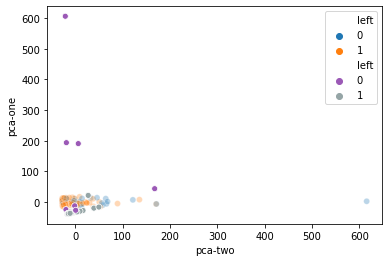

In [134]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
pca = PCA(n_components=3)

cols = ['emp', 'comp', 'cumm_rating', 'satisfied', 'unsatisfied',
       'no_of_ratings', 'lastrtg', 'last_2_ratings', 'last_5_ratings',
       'last_10_ratings', 'supp_opp', 'Numsupp_opp', 'year', 'month', 'day',
       'avg_rtg', 'CompTNE', 'CompAvgRating', 'CompTotRating', 'CompNumRating',
       'CompSuppOppMean', 'average_len_remark', 'CompNumLeft',
       'CompNumRemaining', 'CompFracLeft', 'Personal_Comp_diff_Avg', 'num_opp',
       'num_supp', 'num_remark', 'similarity_with_left_emp']

cols2 = ['cumm_rating', 'satisfied', 'unsatisfied',
       'no_of_ratings', 'lastrtg', 'last_2_ratings', 'last_5_ratings',
       'last_10_ratings', 'supp_opp', 'Numsupp_opp', 'year', 'month', 'day',
       'avg_rtg']

#print(X_train_comp.columns)
X_train2 = X_train_comp.drop(["comp"], axis=1)
pca_result = pca.fit_transform(X_train2[cols2].values)
X_train2['pca-one'] = pca_result[:,0]
X_train2['pca-two'] = pca_result[:,1] 
X_train2['pca-three'] = pca_result[:,2]

X_comp2 = X_train_comp[X_train_comp["comp"] == 'yodaczsb' ].drop(["comp"],axis=1)
Y_comp2 = Y_train_comp[X_train_comp["comp"] == 'yodaczsb']
pca_result = pca.fit_transform(X_comp2[cols2].values)
X_comp2['pca-one'] = pca_result[:,0]
X_comp2['pca-two'] = pca_result[:,1] 
X_comp2['pca-three'] = pca_result[:,2]

sns.scatterplot(
    x="pca-one", y="pca-three",
    hue = Y_comp2,
    #palette=sns.color_palette("hls", 2),
    data=X_comp2,
    legend="full",
    alpha=0.3
)




X_comp2 = X_validation_comp[X_validation_comp["comp"] == 'yodaczsb' ].drop(["comp"],axis=1)
Y_comp2 = Y_validation_comp[X_validation_comp["comp"] == 'yodaczsb']
#pca_result = pca.fit_transform(X_comp2.values)
#X_comp2['pca-one'] = pca_result[:,0]
#X_comp2['pca-two'] = pca_result[:,1] 
#X_comp2['pca-three'] = pca_result[:,2]

#X_comp2 = X_train_comp[X_train_comp["comp"] == 'phcvroct' ].drop(["comp"],axis=1)
#Y_comp2 = Y_train_comp[X_train_comp["comp"] == 'phcvroct']
pca_result = pca.fit_transform(X_comp2[cols2].values)
X_comp2['pca-one'] = pca_result[:,0]
X_comp2['pca-two'] = pca_result[:,1] 
X_comp2['pca-three'] = pca_result[:,2]
#X_comp2['tsne-2d-one'] = tsne_results[:,0]
#X_comp2['tsne-2d-two'] = tsne_results[:,1]

flatui = ["#9b59b6", "#95a5a6", "#e74c3c", "#2ecc71"]
sns.scatterplot(
    x="pca-two", y="pca-one",
    hue=Y_comp2,
    palette=sns.color_palette(flatui,2),
    data=X_comp2,
    legend="full",
    alpha=1
)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 141 samples in 0.000s...
[t-SNE] Computed neighbors for 141 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 141 / 141
[t-SNE] Mean sigma: 10.285796
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.119713
[t-SNE] KL divergence after 300 iterations: 0.308602
[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.691414
[t-SNE] KL divergence after 300 iterations: 0.578487


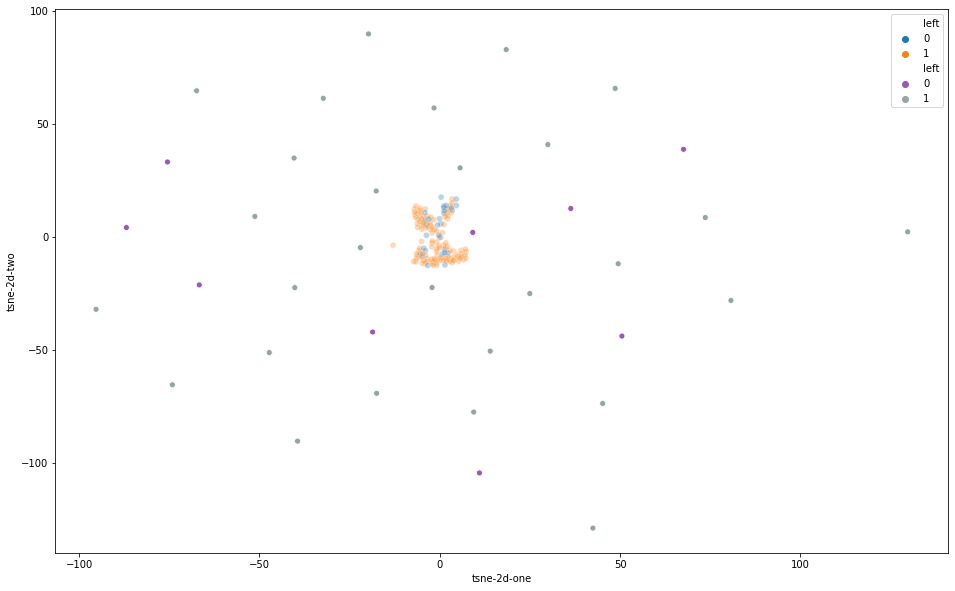

In [136]:
#X_train2 = X_train_comp.drop(["comp"], axis=1)
#pca_result = pca.fit_transform(X_train2[cols2].values)
#X_train2['pca-one'] = pca_result[:,0]
#X_train2['pca-two'] = pca_result[:,1] 
#X_train2['pca-three'] = pca_result[:,2]

X_comp2 = X_train_comp[X_train_comp["comp"] == 'yodaczsb' ].drop(["comp"],axis=1)
Y_comp2 = Y_train_comp[X_train_comp["comp"] == 'yodaczsb']
#pca_result = pca.fit_transform(X_comp2.values)
#X_comp2['pca-one'] = pca_result[:,0]
#X_comp2['pca-two'] = pca_result[:,1] 
#X_comp2['pca-three'] = pca_result[:,2]


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_comp2[cols2])

X_comp2['tsne-2d-one'] = tsne_results[:,0]
X_comp2['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=Y_comp2,
    #palette=sns.color_palette("hls", 2),
    data=X_comp2,
    legend="full",
    alpha=0.3
)


X_comp2 = X_validation_comp[X_validation_comp["comp"] == 'yodaczsb' ].drop(["comp"],axis=1)
Y_comp2 = Y_validation_comp[X_validation_comp["comp"] == 'yodaczsb']
#pca_result = pca.fit_transform(X_comp2.values)
#X_comp2['pca-one'] = pca_result[:,0]
#X_comp2['pca-two'] = pca_result[:,1] 
#X_comp2['pca-three'] = pca_result[:,2]


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_comp2[cols2])

X_comp2['tsne-2d-one'] = tsne_results[:,0]
X_comp2['tsne-2d-two'] = tsne_results[:,1]
flatui = ["#9b59b6", "#95a5a6", "#e74c3c", "#2ecc71"]
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=Y_comp2,
    palette=sns.color_palette(flatui,2),
    data=X_comp2,
    legend="full",
    alpha=1
)


[t-SNE] Computing 6 nearest neighbors...
[t-SNE] Indexed 7 samples in 0.000s...
[t-SNE] Computed neighbors for 7 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 7 / 7
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.589508
[t-SNE] KL divergence after 300 iterations: 0.162222


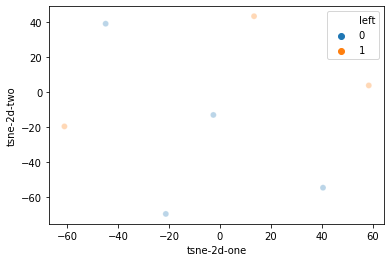

In [108]:
X_comp2 = X_validation_comp[X_validation_comp["comp"] == 'xccmgbjz' ].drop(["comp"],axis=1)
Y_comp2 = Y_validation_comp[X_validation_comp["comp"] == 'xccmgbjz']
#pca_result = pca.fit_transform(X_comp2.values)
#X_comp2['pca-one'] = pca_result[:,0]
#X_comp2['pca-two'] = pca_result[:,1] 
#X_comp2['pca-three'] = pca_result[:,2]


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_comp2[cols2])

X_comp2['tsne-2d-one'] = tsne_results[:,0]
X_comp2['tsne-2d-two'] = tsne_results[:,1]
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=Y_comp2,
    #palette=sns.color_palette("hls", 2),
    data=X_comp2,
    legend="full",
    alpha=0.3
)

In [122]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)



In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
cols = list(tr_modified.columns)
for col in cols:
    tr_modified[col] = tr_modified[col].astype(float)
    tr_modified[[col]] = scaler.fit_transform(tr_modified[[col]])

In [136]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# cols = list(tr_modified_3.columns)
# for col in cols:
#     tr_modified_3[col] = tr_modified_3[col].astype(float)
#     tr_modified_3[[col]] = scaler.fit_transform(tr_modified_3[[col]])

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
cols = list(test_modified.columns)
for col in cols:
    test_modified[col] = test_modified[col].astype(float)
    test_modified[[col]] = scaler.fit_transform(test_modified[[col]])


In [139]:
#X_train = copy.deepcopy(tr_modified_3)
X_train = copy.deepcopy(tr_modified)

Y_train = copy.deepcopy(Y_tr)
test_modified

,emp,comp,cumm_rating,satisfied,unsatisfied,no_of_ratings,lastrtg,last_2_ratings,last_5_ratings,last_10_ratings,...,CompSuppOppMean,average_len_remark,CompNumLeft,CompNumRemaining,CompFracLeft,Personal_Comp_diff_Avg,num_opp,num_supp,num_remark,similarity_with_left_emp
0,0.520492,0.084744,1.000000,1.000000,0.000000,0.061135,1.000000,1.000000,1.000000,1.000000,...,0.453176,0.127976,0.078261,0.603232,0.122221,0.351169,0.003210,0.023802,0.015385,0.492314
1,0.021516,0.034610,0.376812,0.000000,1.000000,0.098981,0.333333,0.333333,0.266667,0.266667,...,0.556318,0.065179,0.013043,0.238779,0.052549,0.870338,0.009631,0.026023,0.025641,0.614896
2,0.001025,0.033699,0.481481,0.000000,1.000000,0.024745,0.666667,0.500000,0.533333,0.533333,...,0.577054,0.000000,0.026087,0.511670,0.049500,0.809819,0.012841,0.006030,0.000000,0.581017
3,0.905738,0.625334,0.610442,0.548193,0.951807,0.119360,0.666667,0.833333,0.666667,0.566667,...,0.554405,0.100446,1.000000,1.000000,0.704653,0.795600,0.011236,0.065059,0.010256,0.335765
4,0.773566,0.625334,0.370370,0.000000,0.944444,0.011645,0.666667,0.333333,0.466667,0.370370,...,0.554405,0.116071,1.000000,1.000000,0.704653,0.711646,0.000000,0.002222,0.005128,0.857994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.035861,0.095447,0.554054,0.000000,1.000000,0.106259,0.666667,0.666667,0.533333,0.400000,...,0.804291,0.038690,0.052174,0.326750,0.147996,0.860236,0.001605,0.014916,0.005128,0.825155
878,0.029713,0.000000,1.000000,1.000000,0.000000,0.001456,1.000000,1.000000,1.000000,1.000000,...,0.894913,0.107143,0.000000,0.104129,0.000000,0.710836,0.000000,0.003491,0.010256,0.277134
879,0.014344,0.000000,0.750000,0.000000,0.875000,0.004367,1.000000,0.833333,0.750000,0.750000,...,0.584676,0.000000,0.000000,0.132855,0.000000,0.835951,0.000000,0.000000,0.000000,0.913151
880,0.129098,0.033699,0.604938,0.537037,0.962963,0.037846,0.666667,0.666667,0.666667,0.566667,...,0.577054,0.000000,0.026087,0.511670,0.049500,0.827057,0.012841,0.003808,0.000000,0.823848


In [140]:
X_train.shape,Y_tr.shape

((3526, 30), (3526,))

In [141]:
tr_modified.columns

Index(['emp', 'comp', 'cumm_rating', 'satisfied', 'unsatisfied',
       'no_of_ratings', 'lastrtg', 'last_2_ratings', 'last_5_ratings',
       'last_10_ratings', 'supp_opp', 'Numsupp_opp', 'year', 'month', 'day',
       'avg_rtg', 'CompTNE', 'CompAvgRating', 'CompTotRating', 'CompNumRating',
       'CompSuppOppMean', 'average_len_remark', 'CompNumLeft',
       'CompNumRemaining', 'CompFracLeft', 'Personal_Comp_diff_Avg', 'num_opp',
       'num_supp', 'num_remark', 'similarity_with_left_emp'],
      dtype='object')

In [142]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(sampling_strategy=0.3)
# X, y = oversample.fit_resample(X_train, Y_train)
# size = y.size
# indices = np.array(range(len(y)))
# np.random.shuffle(indices)
# X = X.iloc[indices]
# y = y.iloc[indices]
# print(X.shape, np.asarray(np.where(y==1)).shape, type(X_train), type(X))
# size = Y_train.size
# indices = np.array(range(len(Y_train)))
# np.random.shuffle(indices)
# np.random.shuffle(indices)


# X = X_train.iloc[indices]
# y = Y_train.iloc[indices]

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

/home/suhas/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/suhas/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [94]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost', AdaBoostClassifier(random_state=12)))

In [95]:
def evaluate(estimator, X_values, Y_truth):
    estimator.fit(X_values,Y_truth)
    weight_vec = 4*Y_truth+1
    return (np.sum((np.multiply(weight_vec, 1.*(Y_values==Y_truth))/np.sum(weight_vec))))

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X, y, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X, y, cv=kfold, scoring='roc_auc')
    #cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
    #    model, X_train, Y_train, cv=kfold, scoring=evaluate)

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/home/suhas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/suhas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/suhas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/suhas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,XGB,95.47,0.91,92.20,1.19
1,Random Forest,94.80,0.76,91.75,1.24
7,AdaBoost,93.34,1.37,90.05,1.35
0,Logistic Regression,89.32,2.01,84.35,1.95
2,SVM,88.58,2.30,88.34,1.15
3,KNN,87.66,2.58,88.54,1.72
5,Gaussian NB,84.48,2.35,85.54,1.57
4,Decision Tree Classifier,80.35,3.13,88.43,1.45


In [96]:
def evaluate(Y_values, Y_truth):
    weight_vec = 4*Y_truth+1
    return (np.sum((np.multiply(weight_vec, 1.*(Y_values==Y_truth))/np.sum(weight_vec))))

size = y.size
indices = np.array(range(len(y)))
np.random.shuffle(indices)
train_indices = indices[:int(0.8*len(y))]
validationn_indices = indices[int(0.8*len(y)):]

X_tr = X.iloc[train_indices]
Y_tr = y.iloc[train_indices]

X_validation = X.iloc[validationn_indices]
Y_validation = y.iloc[validationn_indices]

In [104]:
X.head()

,id,emp,comp,cumm_rating,satisfied,unsatisfied,no_of_ratings,lastrtg,last_2_ratings,last_5_ratings,...,CompSuppOppMean,average_len_remark,CompNumLeft,CompNumRemaining,CompFracLeft,Personal_Comp_diff_Avg,num_opp,num_supp,num_remark,similarity_with_left_emp
566,0.405573,0.335671,0.625334,0.424242,0.000000,1.000000,0.028417,0.666667,0.666667,0.333333,...,0.554405,0.000000,1.000000,1.000000,0.704653,0.801338,0.000000,0.000000,0.000000,0.896566
1719,0.561197,0.369739,0.247625,0.567568,0.621622,0.878378,0.048714,0.666667,0.333333,0.666667,...,0.508553,0.000000,0.152174,0.335727,0.377698,0.849380,0.005612,0.004506,0.000000,0.884910
1131,0.307740,0.010020,0.625334,0.488506,0.560345,0.939655,0.077131,1.000000,0.833333,0.600000,...,0.554405,0.000000,1.000000,1.000000,0.704653,0.813515,0.000000,0.000000,0.000000,0.866707
1749,0.842312,0.103206,0.095447,0.691176,0.569853,0.930147,0.182679,0.666667,0.666667,0.666667,...,0.804291,0.166631,0.052174,0.326750,0.147996,0.874927,0.039282,0.172514,0.095808,0.214389
1940,0.949020,0.233467,0.231215,0.666667,0.000000,1.000000,0.017591,0.666667,0.666667,0.666667,...,0.398800,0.068711,0.226087,0.675045,0.292321,0.813539,0.012346,0.004828,0.005988,0.529607


In [97]:

best = -1
for trees in range(1,500,10):
    if (trees-1)%100==0:
        print(trees)
    rf = RandomForestClassifier(n_estimators=trees,random_state=43)
    rf.fit(X_tr,Y_tr)
    pred = rf.predict(X_validation)

    val_accss = evaluate(pred, Y_validation)
    #print(val_accss)
    if val_accss >= best:
        print(val_accss)
        print(trees)
        best_tree = trees
        best_rf = rf
        best = val_accss
        


# names = X_train.columns
# print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))


# print(np.sum(pred==Y_validation)/len(pred))


1
0.7754590984974958
1
0.7888146911519198
11
0.8113522537562605
21
0.8213689482470785
31
101
201
301
401


In [98]:
y_pred = best_rf.predict(X_validation)

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(Y_validation,y_pred)

array([[564,  19],
       [ 39,  84]])

In [101]:
best_tree

31

In [102]:
#rf = RandomForestClassifier(n_estimators=best_tree,random_state=43)
best_rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

In [103]:
names = X.columns
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))


[(0.0809, 'CompFracLeft'), (0.0772, 'comp'), (0.072, 'CompNumLeft'), (0.0612, 'id'), (0.058, 'Numsupp_opp'), (0.0507, 'emp'), (0.0481, 'num_supp'), (0.0428, 'day'), (0.041, 'average_len_remark'), (0.0408, 'year'), (0.036, 'num_remark'), (0.0347, 'month'), (0.0324, 'Personal_Comp_diff_Avg'), (0.0316, 'CompTNE'), (0.0292, 'similarity_with_left_emp'), (0.0285, 'avg_rtg'), (0.025, 'no_of_ratings'), (0.0225, 'cumm_rating'), (0.0188, 'CompNumRemaining'), (0.0177, 'supp_opp'), (0.0174, 'num_opp'), (0.0169, 'last_10_ratings'), (0.0158, 'unsatisfied'), (0.0157, 'last_5_ratings'), (0.0156, 'satisfied'), (0.0153, 'CompTotRating'), (0.0146, 'CompNumRating'), (0.0113, 'last_2_ratings'), (0.0103, 'CompAvgRating'), (0.0097, 'CompSuppOppMean'), (0.0084, 'lastrtg')]


In [301]:
preds_final_test = rf.predict(test_modified)

In [302]:
test["left"] = test["emp"]
test["left"] = preds_final_test
submisson = test.drop(["emp","comp","lastratingdate"],axis=1)
submisson.to_csv("test_pred8.csv")

In [122]:
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))import xgboost as xgb
from sklearn.metrics import accuracy_score
model = xgb.XGBClassifier()
model.fit(X_train,Y_train)
predict_train = model.predict(X_train)
#accuracy_train = accuracy_score(X_tr,Y_tr)
#redict_test = model.predict(X_validation)



In [123]:
X_test = copy.deepcopy(test_modified)

In [125]:
preds_final_test = model.predict(X_test)

In [128]:
test["left"] = test["emp"]

In [130]:
test["left"] = preds_final_test

In [132]:
submisson = test.drop(["emp","comp","lastratingdate"],axis=1)

In [136]:
submisson.to_csv("test_pred2.csv")

In [80]:
Y_tr.shape

(2820,)

In [81]:
X_train.shape

(882, 17)

In [82]:
tr_modified.shape

(3526, 17)

In [137]:
X_train

,comp,cumm_rating,no_of_ratings,supp_opp,Numsupp_opp,year,month,day,CompTNE,CompAvgRating,CompTotRating,CompNumRating,CompSuppOppMean,average_len_remark,num_opp,num_supp,num_remark
0,0.625334,0.666667,0.000000,0.852136,0.000000,0.666667,0.818182,0.533333,1.000000,0.088470,1.000000,1.000000,0.554405,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.922619,0.150203,0.889313,0.076119,1.000000,0.181818,0.600000,0.214740,0.459010,0.127061,0.108756,0.760063,0.154829,0.032548,0.074992,0.155689
2,0.080666,0.641026,0.033829,1.000000,0.009297,0.666667,0.727273,0.666667,0.212198,0.132332,0.072575,0.071209,0.668829,0.052016,0.000000,0.010299,0.014970
3,0.231215,0.470588,0.021651,0.950000,0.005811,1.000000,0.181818,0.533333,0.543837,0.234246,0.076856,0.072121,0.398800,0.024077,0.001122,0.006115,0.014970
4,0.080666,0.600000,0.005413,0.875000,0.002324,0.666667,0.272727,0.100000,0.212198,0.132332,0.072575,0.071209,0.668829,0.085179,0.001122,0.002253,0.005988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,0.034610,0.633803,0.094723,0.814815,0.007844,1.000000,0.181818,0.633333,0.172808,0.312358,0.140601,0.127638,0.556318,0.084548,0.005612,0.007081,0.026946
3522,0.000000,0.694444,0.014885,0.800000,0.001453,1.000000,0.181818,0.533333,0.024142,0.560271,0.003677,0.003051,0.783053,0.032368,0.001122,0.001287,0.005988
3523,0.297808,0.666667,0.001353,0.852136,0.000000,1.000000,0.727273,0.066667,0.062262,0.866881,0.019151,0.014147,0.415874,0.000000,0.000000,0.000000,0.000000
3524,0.034610,0.722222,0.014885,0.852136,0.000000,1.000000,0.000000,0.066667,0.172808,0.312358,0.140601,0.127638,0.556318,0.093507,0.000000,0.000000,0.008982


In [138]:
test_modified

,comp,cumm_rating,no_of_ratings,supp_opp,Numsupp_opp,year,month,day,CompTNE,CompAvgRating,CompTotRating,CompNumRating,CompSuppOppMean,average_len_remark,num_opp,num_supp,num_remark
0,0.084744,1.000000,0.075515,0.974026,0.020403,1.000000,0.181818,0.633333,0.449809,0.658439,0.661804,0.529968,0.453176,0.127976,0.003210,0.023802,0.015385
1,0.034610,0.393939,0.098398,0.931818,0.023317,1.000000,0.181818,0.533333,0.172808,0.323800,0.140601,0.127638,0.556318,0.065179,0.009631,0.026023,0.025641
2,0.033699,0.583333,0.006865,0.703704,0.007154,1.000000,0.727273,0.000000,0.369759,0.128086,0.339709,0.334410,0.577054,0.000000,0.012841,0.006030,0.000000
3,0.625334,0.222222,0.004577,0.966981,0.056174,0.666667,0.000000,0.300000,1.000000,0.091711,1.000000,1.000000,0.554405,0.100446,0.011236,0.065059,0.010256
4,0.625334,0.500000,0.002288,1.000000,0.001855,1.000000,0.454545,0.033333,1.000000,0.091711,1.000000,1.000000,0.554405,0.116071,0.000000,0.002222,0.005128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.095447,0.589744,0.027460,0.979167,0.012719,0.666667,0.363636,0.300000,0.246506,0.343764,0.547786,0.493234,0.804291,0.038690,0.001605,0.014916,0.005128
878,0.000000,1.000000,0.002288,1.000000,0.002915,1.000000,0.181818,0.433333,0.073698,0.255197,0.001116,0.001090,0.894913,0.107143,0.000000,0.003491,0.010256
879,0.000000,0.750000,0.006865,0.852136,0.000000,1.000000,0.000000,0.966667,0.094028,0.178659,0.030573,0.029502,0.584676,0.000000,0.000000,0.000000,0.000000
880,0.033699,0.687500,0.034325,0.600000,0.005299,1.000000,0.181818,0.533333,0.369759,0.128086,0.339709,0.334410,0.577054,0.000000,0.012841,0.003808,0.000000


In [27]:
tr.head()

,id,emp,comp,lastratingdate,left
0,2228,939,phcvroct,2016-10-17,1
1,4349,250,jblrepyr,2017-03-19,0
2,945,134,ewpvmfbc,2016-09-21,0
3,4553,164,wsmblohy,2017-03-17,0
4,941,129,ewpvmfbc,2016-04-04,0


In [55]:
emp_rating = df_comp_RatingOfEmp["phcvroct"][(df_comp_RatingOfEmp["phcvroct"]["emp"] == 200)]


In [56]:
emp_rating["Date"] = pd.to_datetime(emp_rating["Date"]).dt.date.values

/home/suhas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
emp_rating = emp_rating.sort_values(by=["Date"],ascending = False)

In [59]:
tr[(tr["comp"] == "phcvroct") & (tr["emp"]==200)]

,id,emp,comp,lastratingdate,left
1427,1852,200,phcvroct,2016-11-08,1


In [63]:
emp_rating.head(10)

,emp,comp,Date,rating
86432,200,phcvroct,2016-12-07,2
75970,200,phcvroct,2016-12-01,1
86398,200,phcvroct,2016-11-07,4
80490,200,phcvroct,2016-11-04,3
78981,200,phcvroct,2016-11-03,4
75952,200,phcvroct,2016-11-01,4
84283,200,phcvroct,2016-10-06,1
82231,200,phcvroct,2016-10-05,3
78912,200,phcvroct,2016-10-03,4
84214,200,phcvroct,2016-09-06,2


In [66]:
 emp_rating["rating"].iloc[:2].mean()

1.5